In [2]:
import nltk
import matplotlib._color_data as mcd
import os
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk import word_tokenize
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

import seaborn as sns


import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
file_names = sorted(os.listdir('../Readings'))

fileDict = {}
for file_name in file_names:
    if file_name.endswith(".txt"):
        fileDict[file_name] = open('../readings/' + file_name, encoding='latin2').read()

imTitles = list(fileDict.keys())
imTexts = list(fileDict.values())

In [3]:
colourHexDictionary = { colour.split(':')[1]: hex for colour, hex in mcd.XKCD_COLORS.items() }

In [4]:
# Now we have the list of colours, we can do some analysis

imLowerTokens = { title: nltk.word_tokenize(text.lower()) for title, text in fileDict.items() }


# colourCountDF = pd.Series(colourCount)

# # Sanity check
# print(colourCountDF)

def createColourCountDF(title, tokens):
    colourCount = {}
    colourHexDictionary = { colour.split(':')[1]: hex for colour, hex in mcd.XKCD_COLORS.items() }
    
    for token in tokens:
        for colour, hex in colourHexDictionary.items():
            if token == colour:
                if token in colourCount:
                    colourCount[token] = colourCount[token] + 1
                else:
                    colourCount[token] = 1
                    
    return pd.Series(colourCount)               
    

In [5]:
colourCountDFs = { title: createColourCountDF(title, tokens) for title, tokens in imLowerTokens.items() }

In [6]:
def translateColoursToHex(listColourNames):
    """"Take a list of colour names ['red','blue','green'] and return hex list"""
    hexList = []
    for colourName in listColourNames:
        xkcdName = f"xkcd:{colourName}"
        if xkcdName in mcd.XKCD_COLORS:
            hexList.append(mcd.XKCD_COLORS[xkcdName])
        else:
            print("Not found" + colourName)

    return hexList



book-and-the-brotherhood.txt




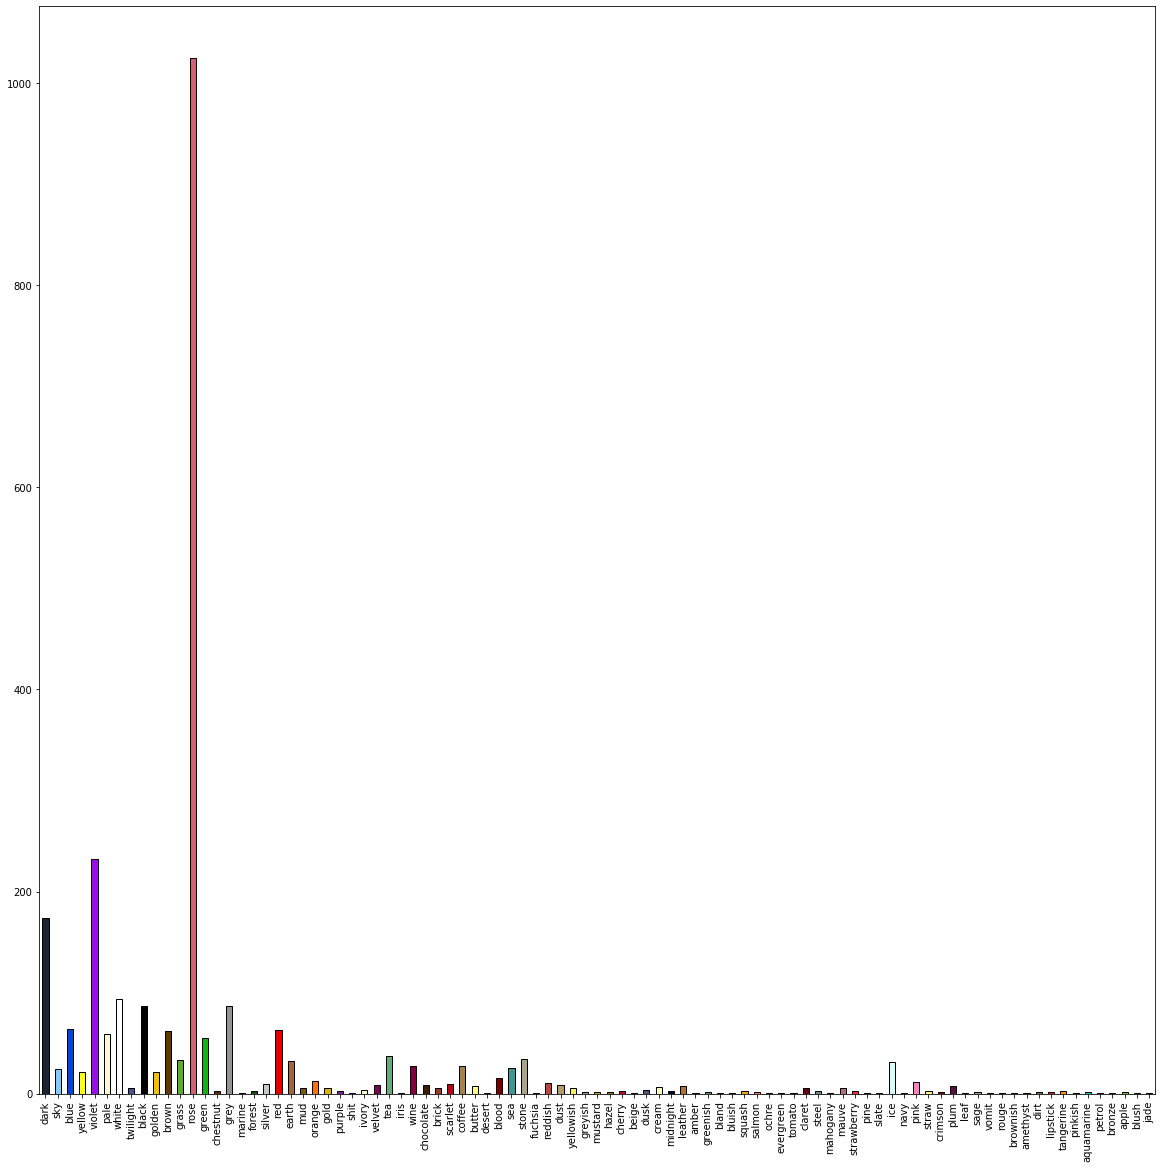



nuns-and-soldiers.txt




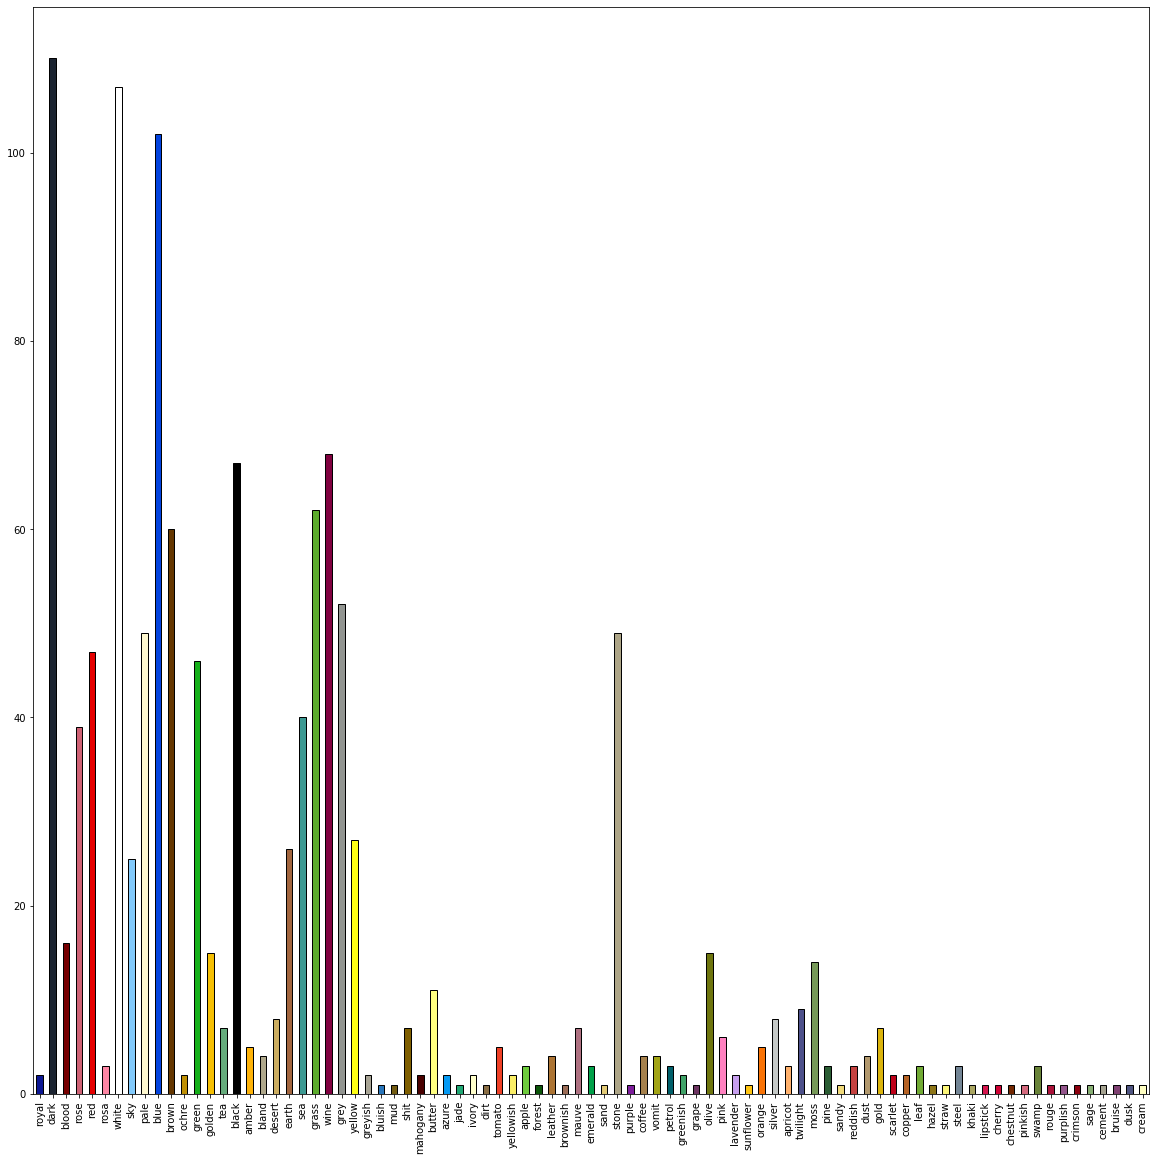



severed-head.txt




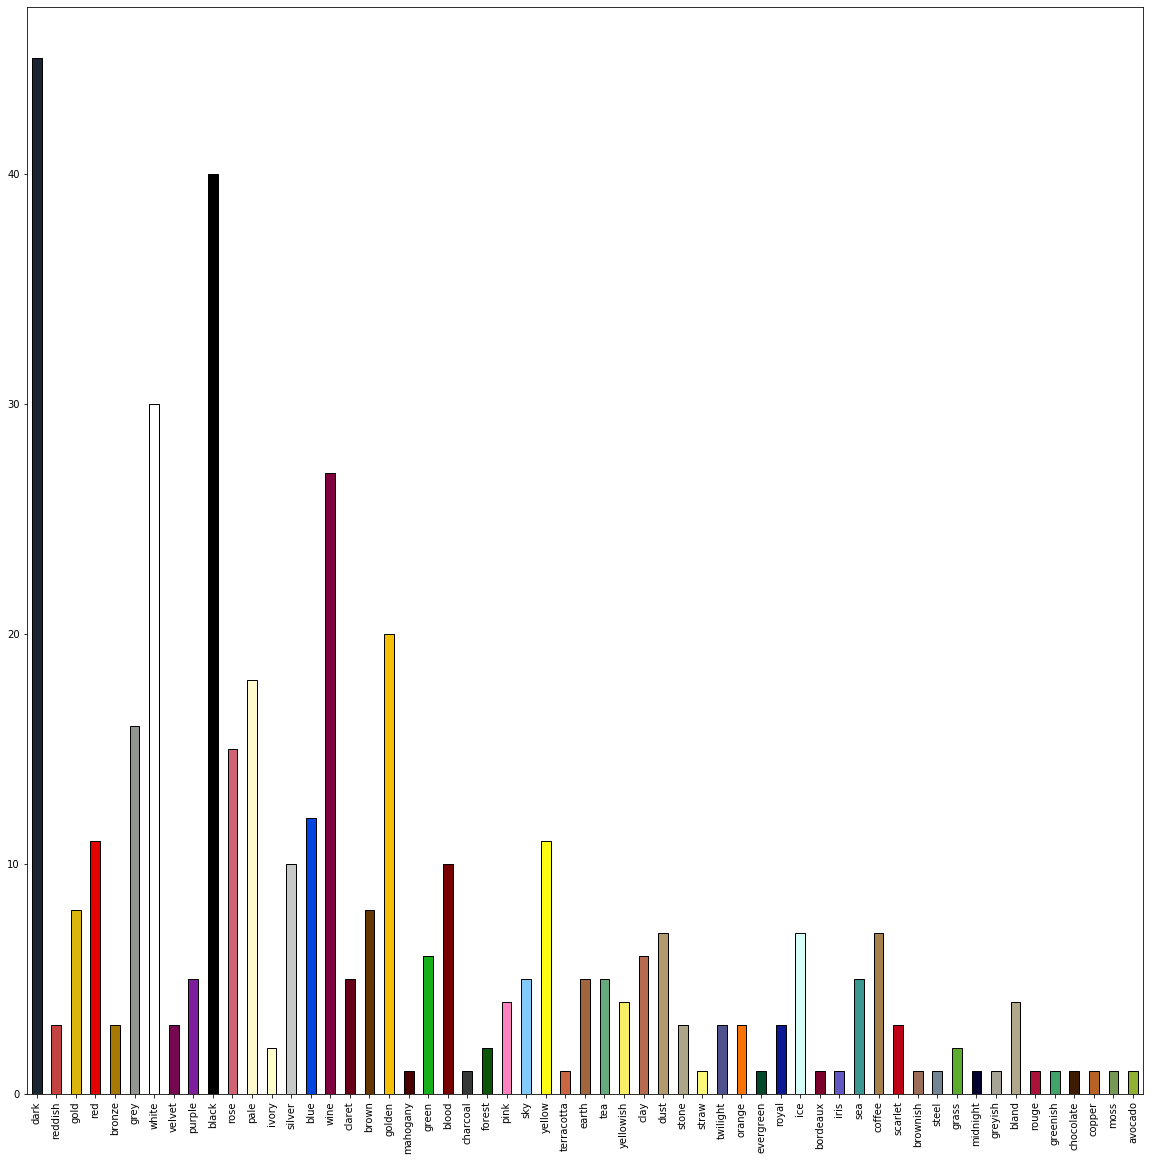



italian-girl.txt




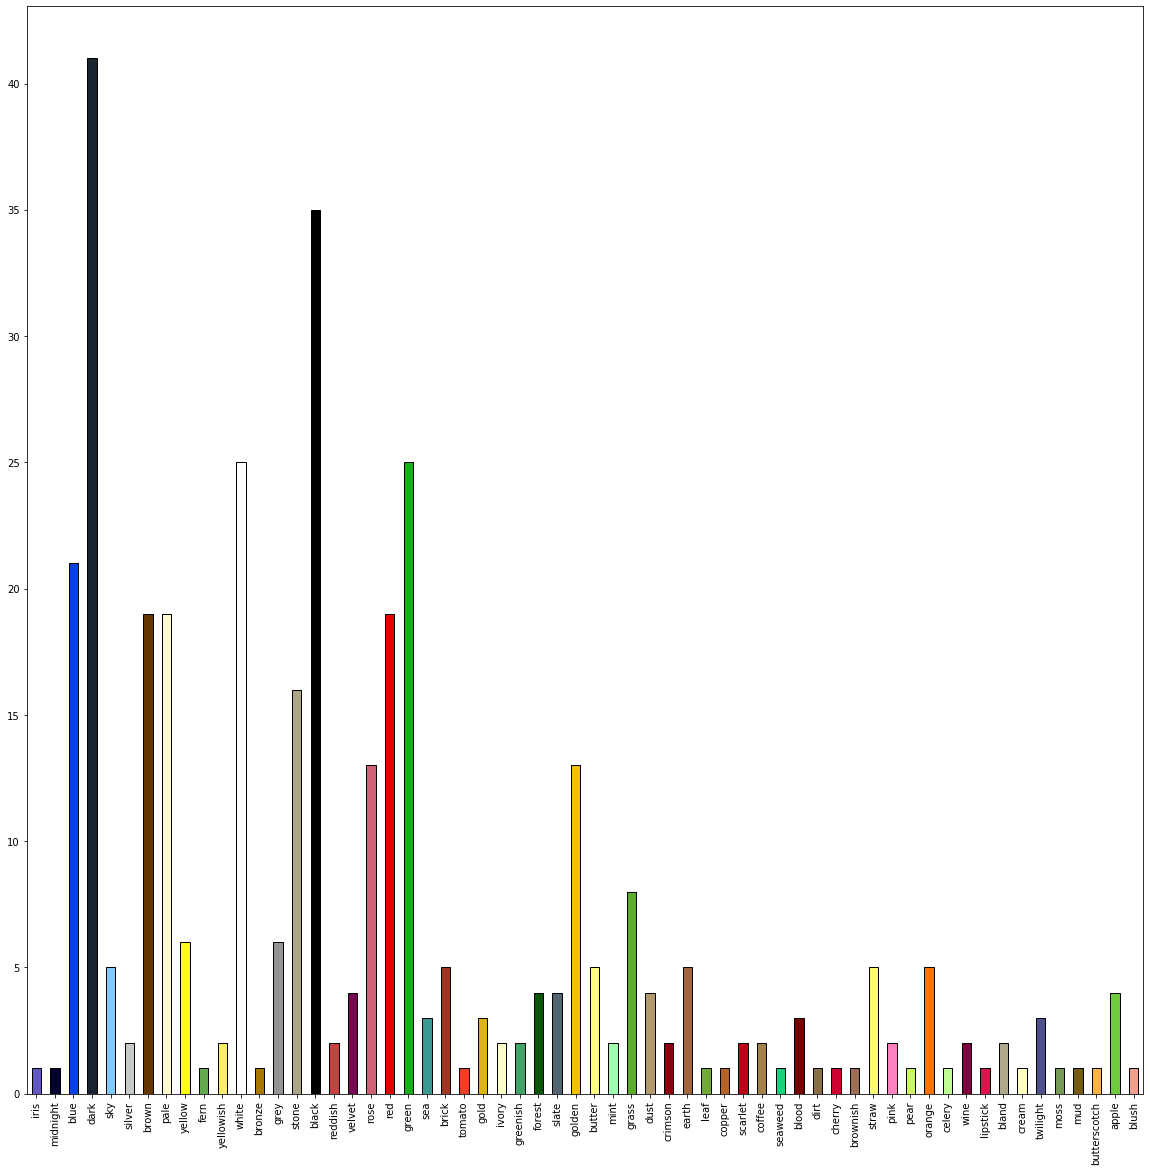



nice-and-the-good.txt




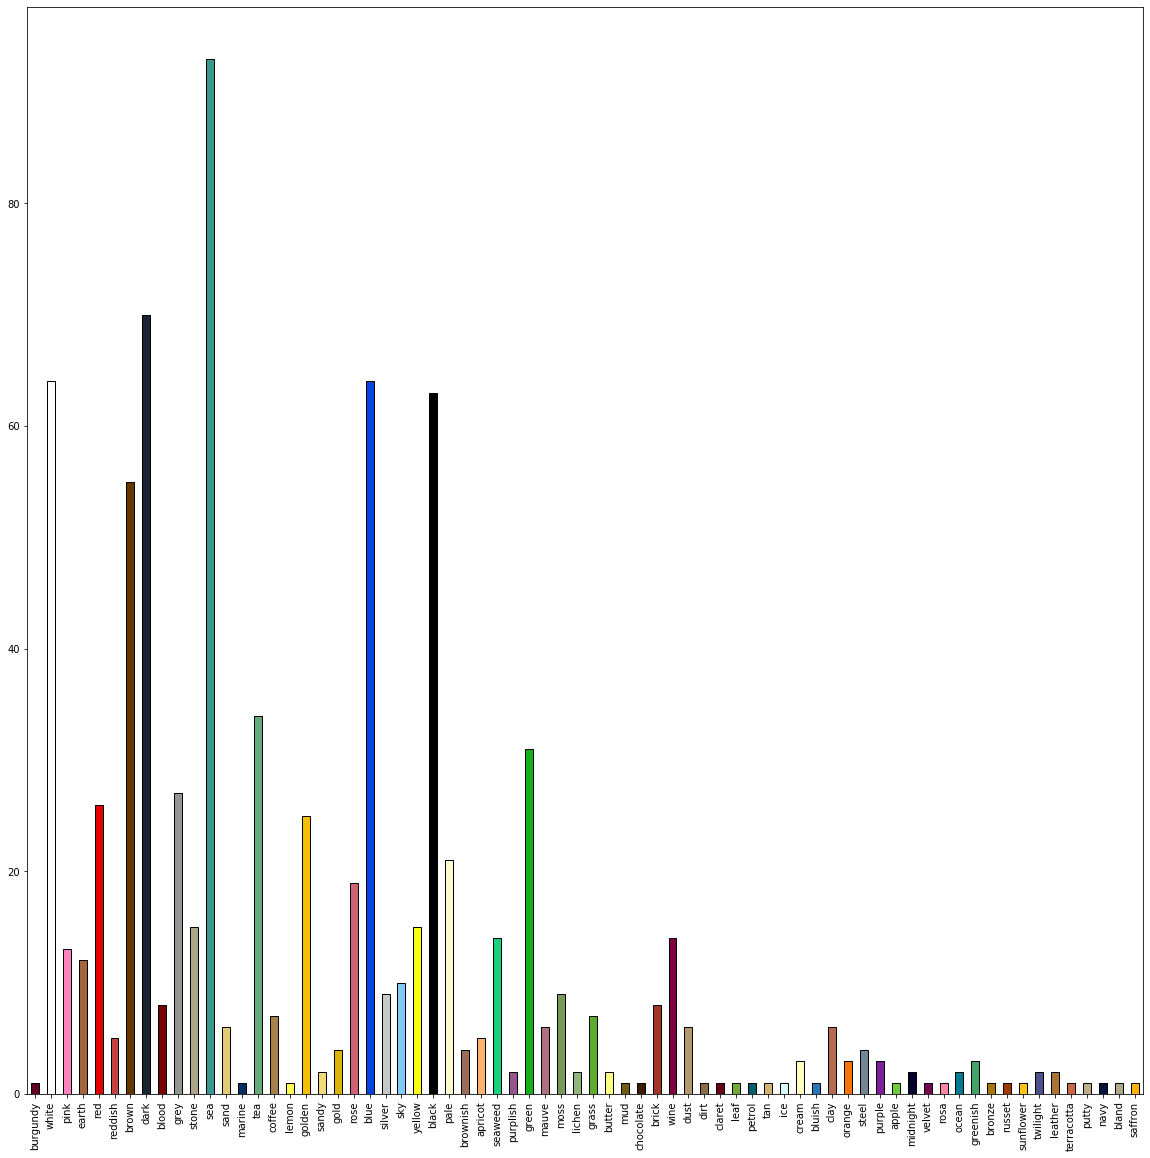



red-and-the-green.txt




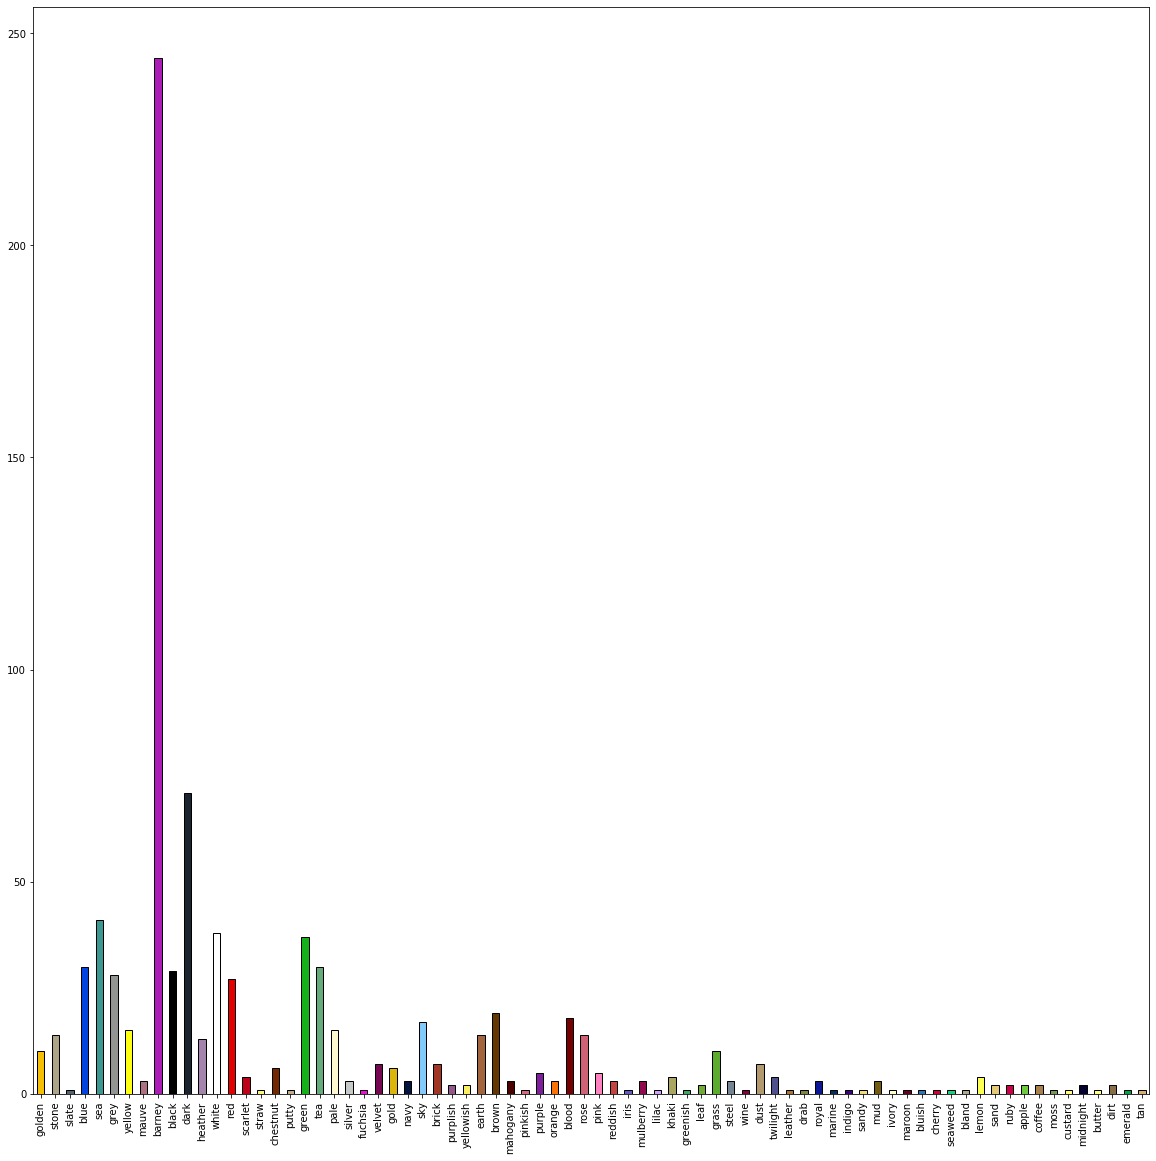



the-sea-the-sea-novel.txt




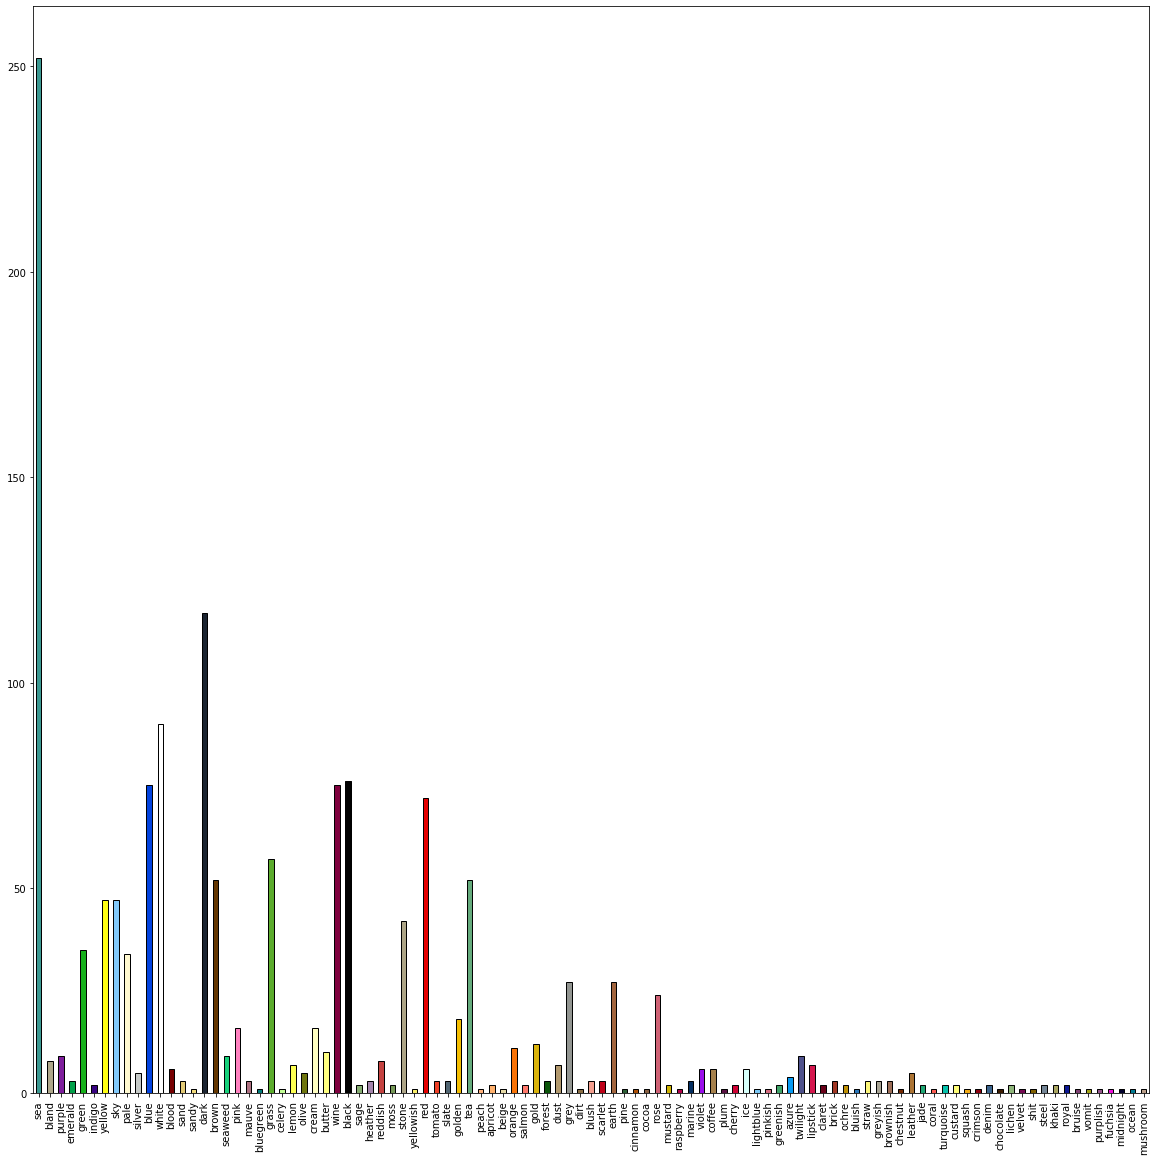



message-to-the-planet.txt




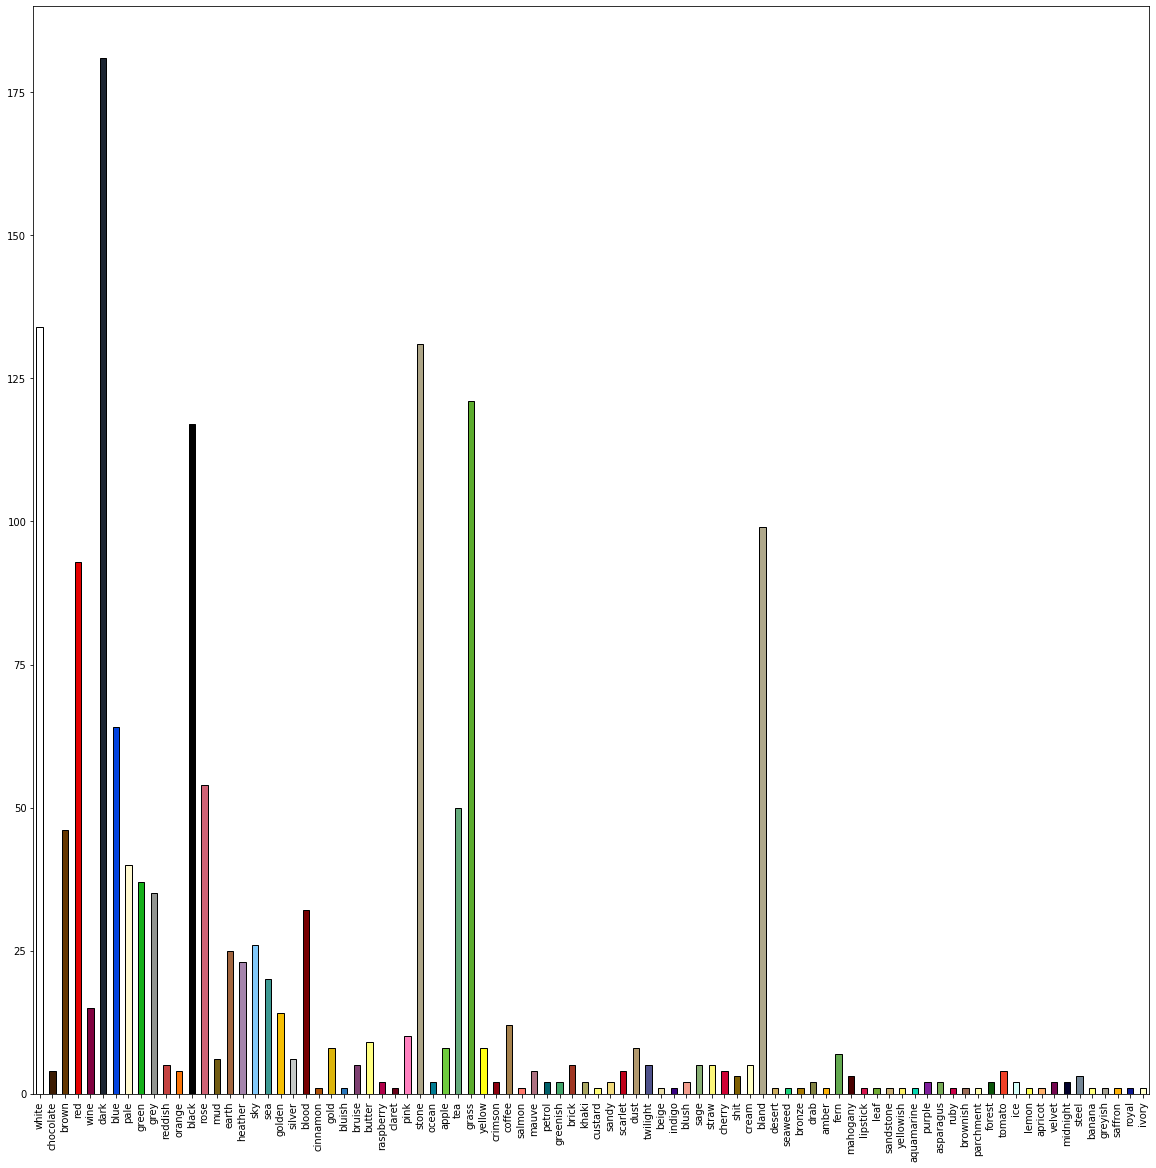



unicorn.txt




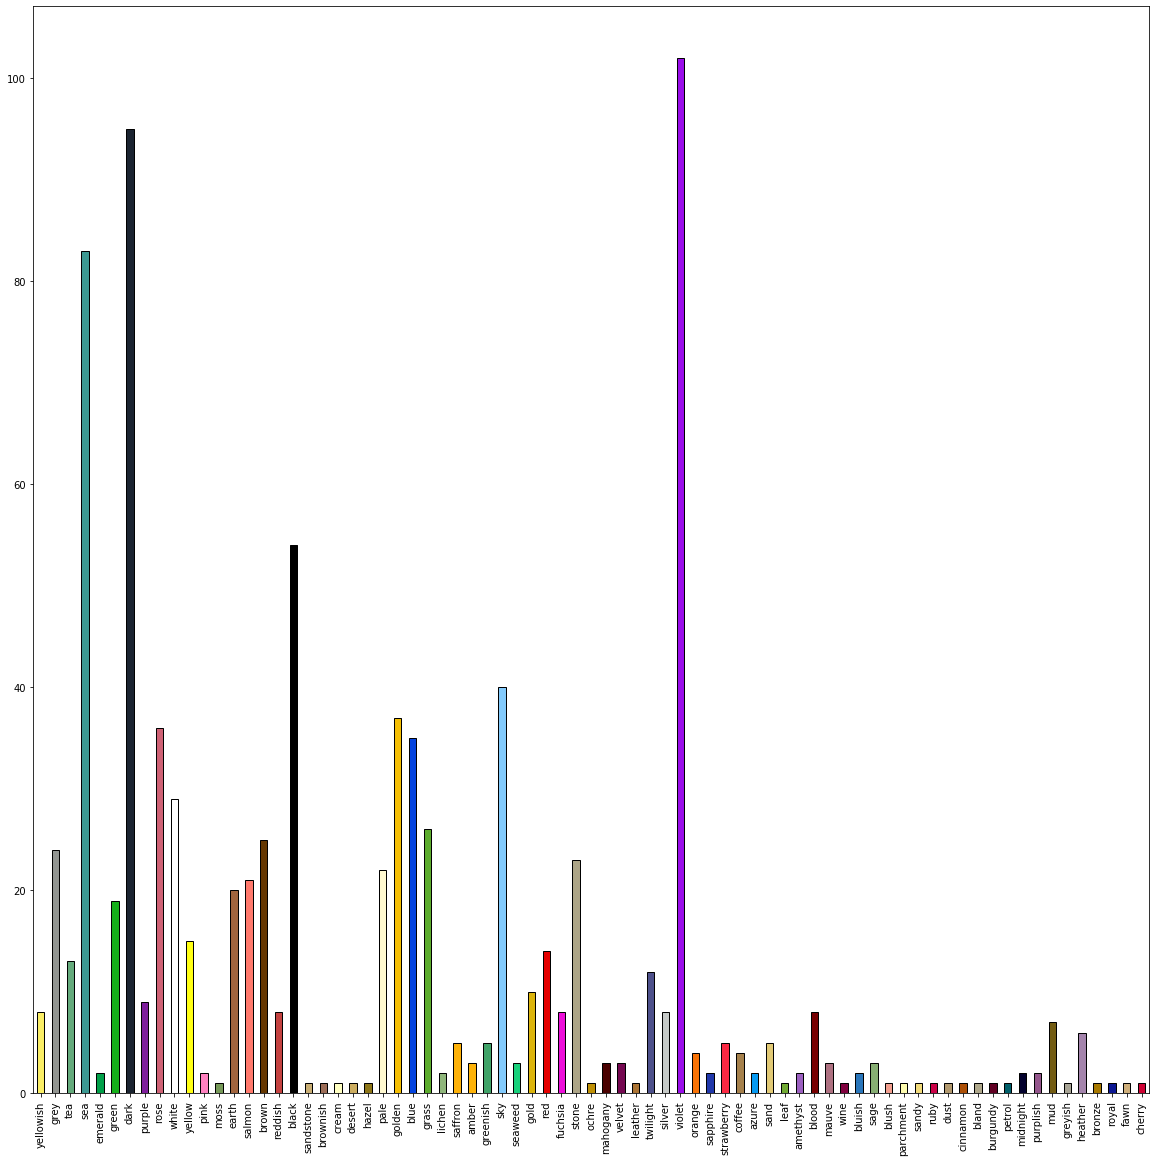



bell.txt




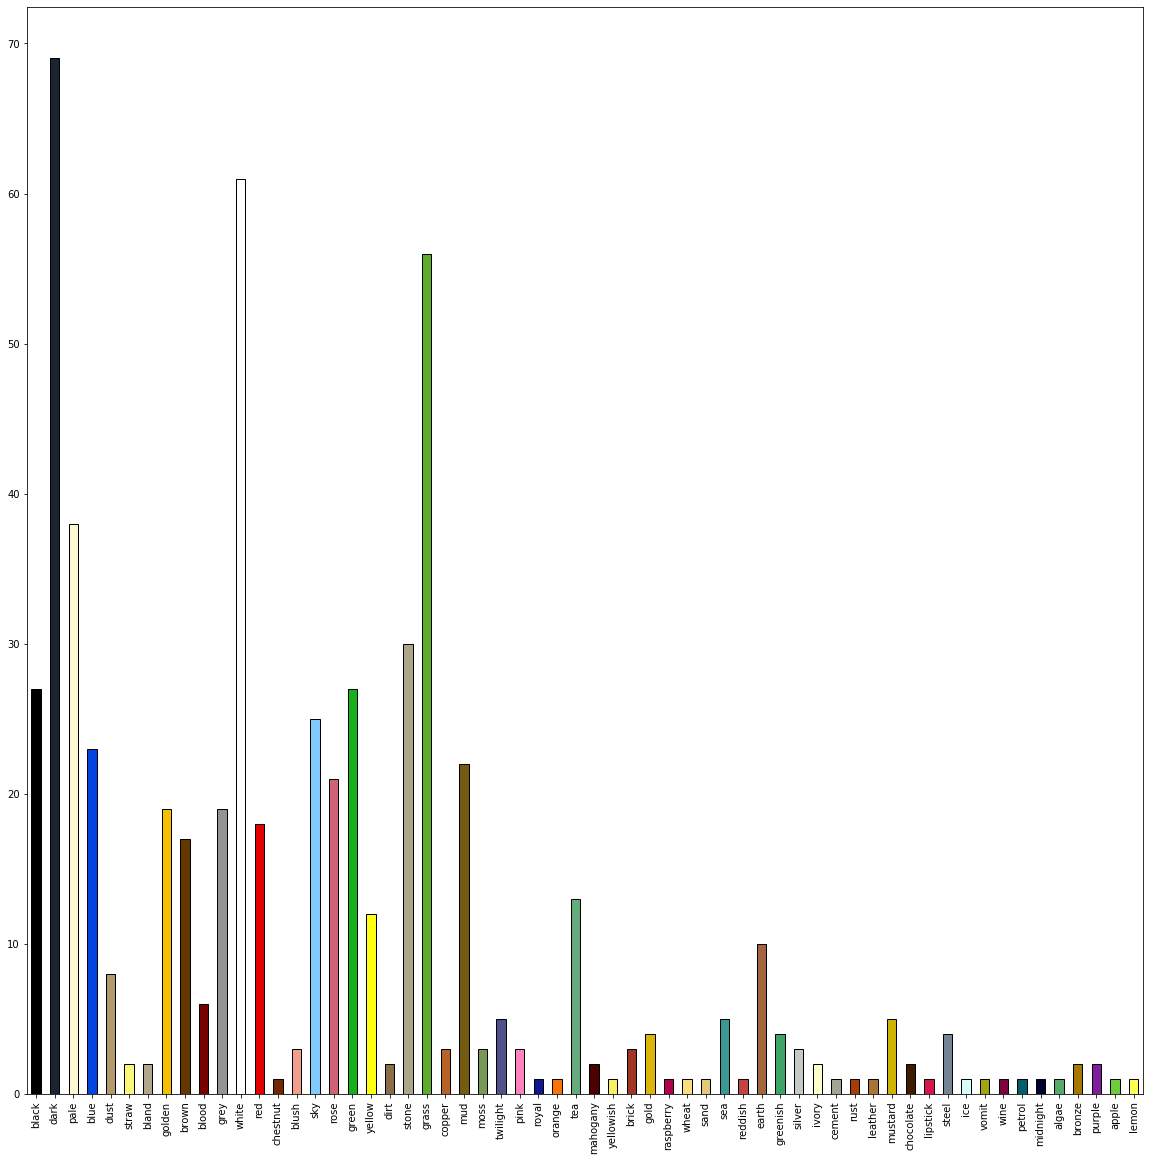



accidental-man.txt




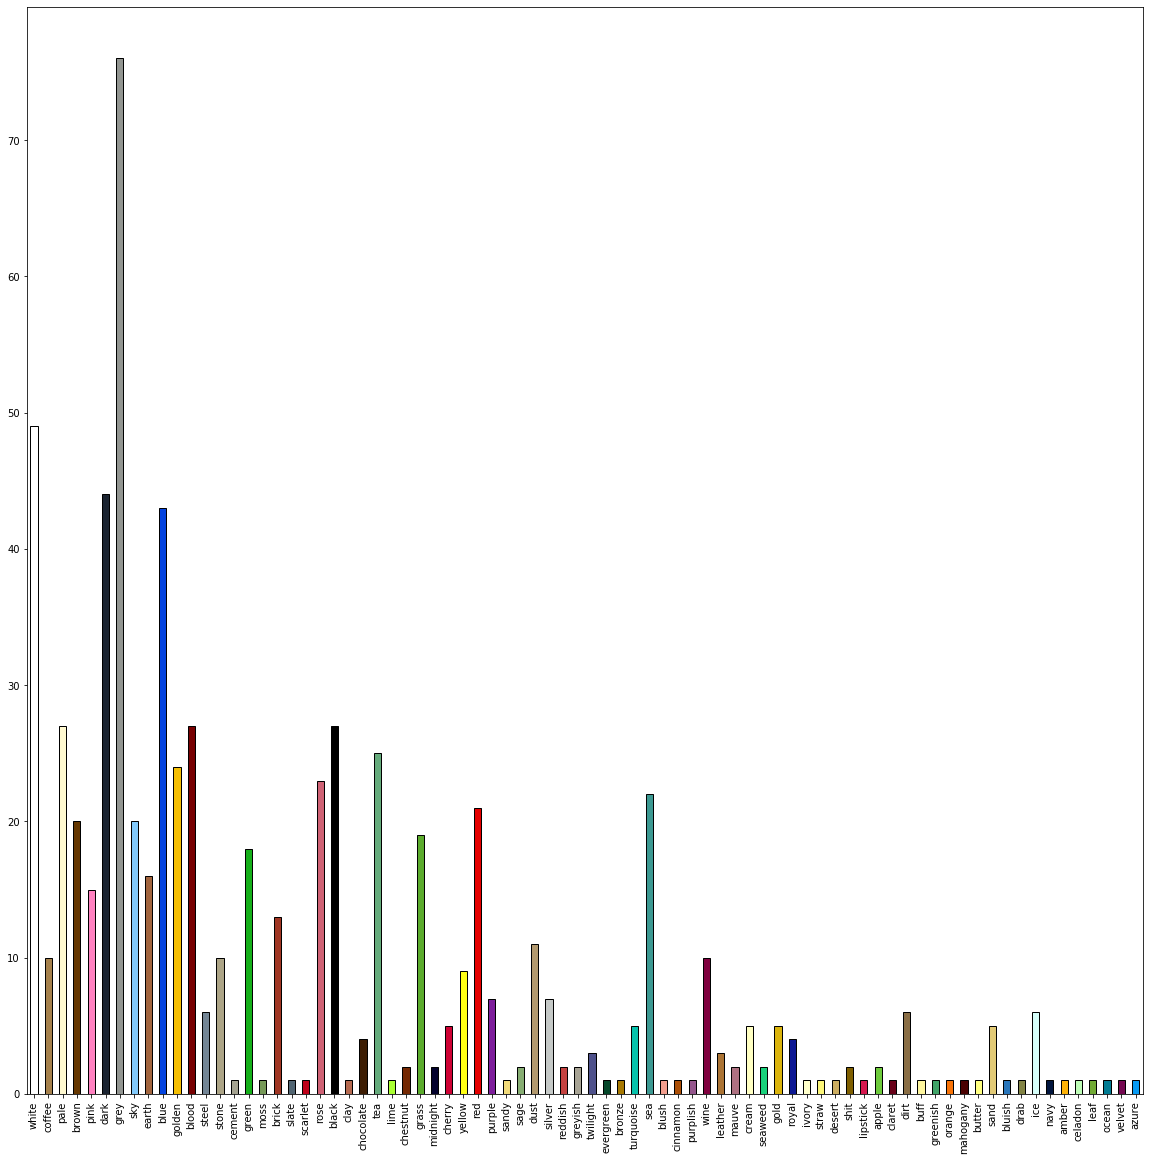



philosopher-s-pupil.txt




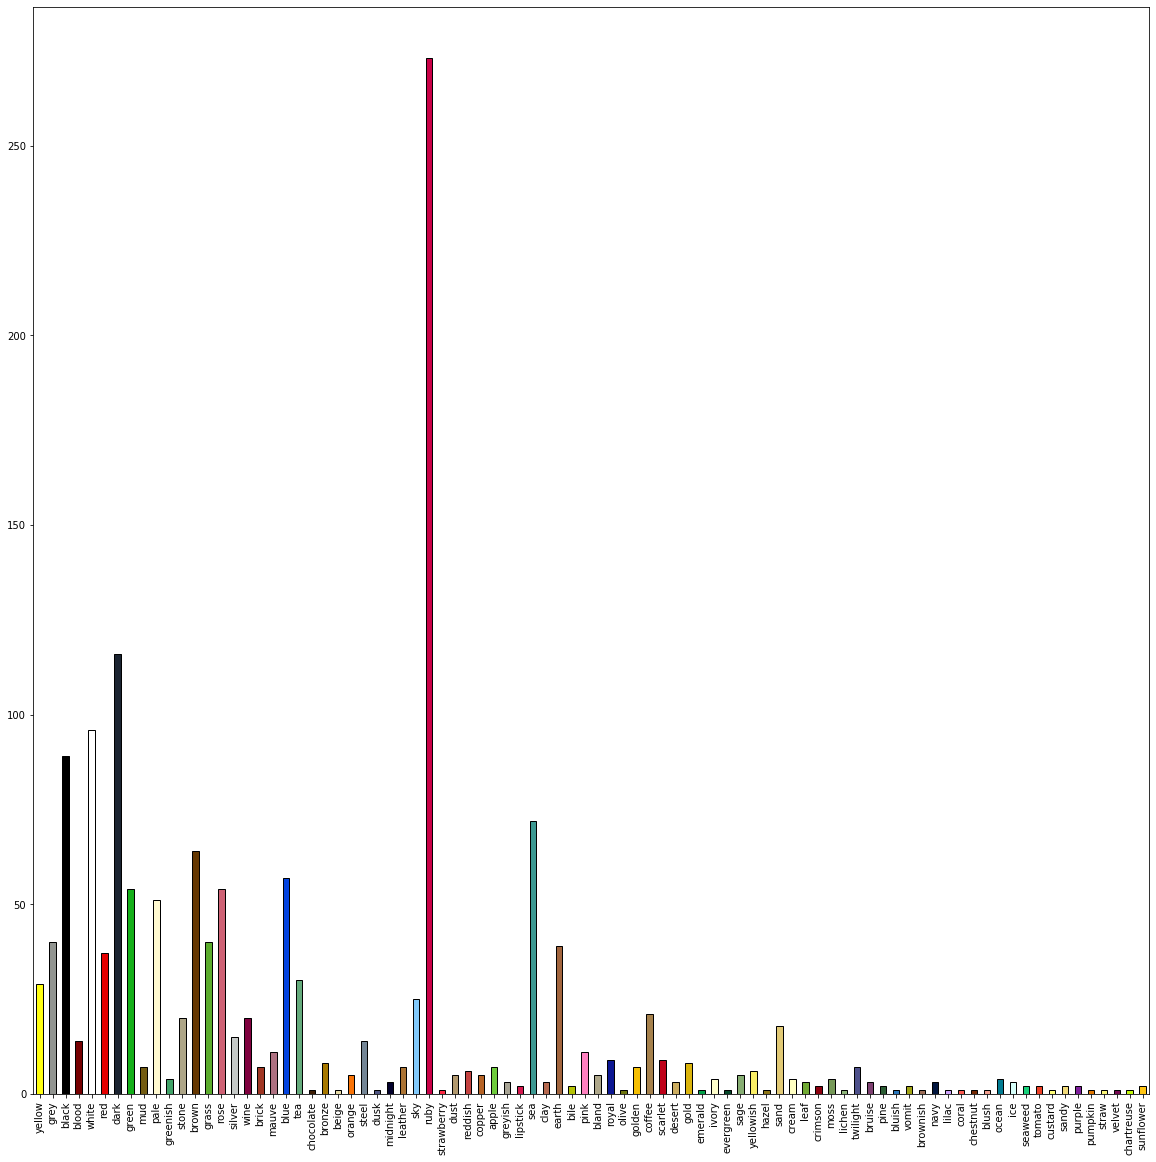



time-of-the-angels.txt




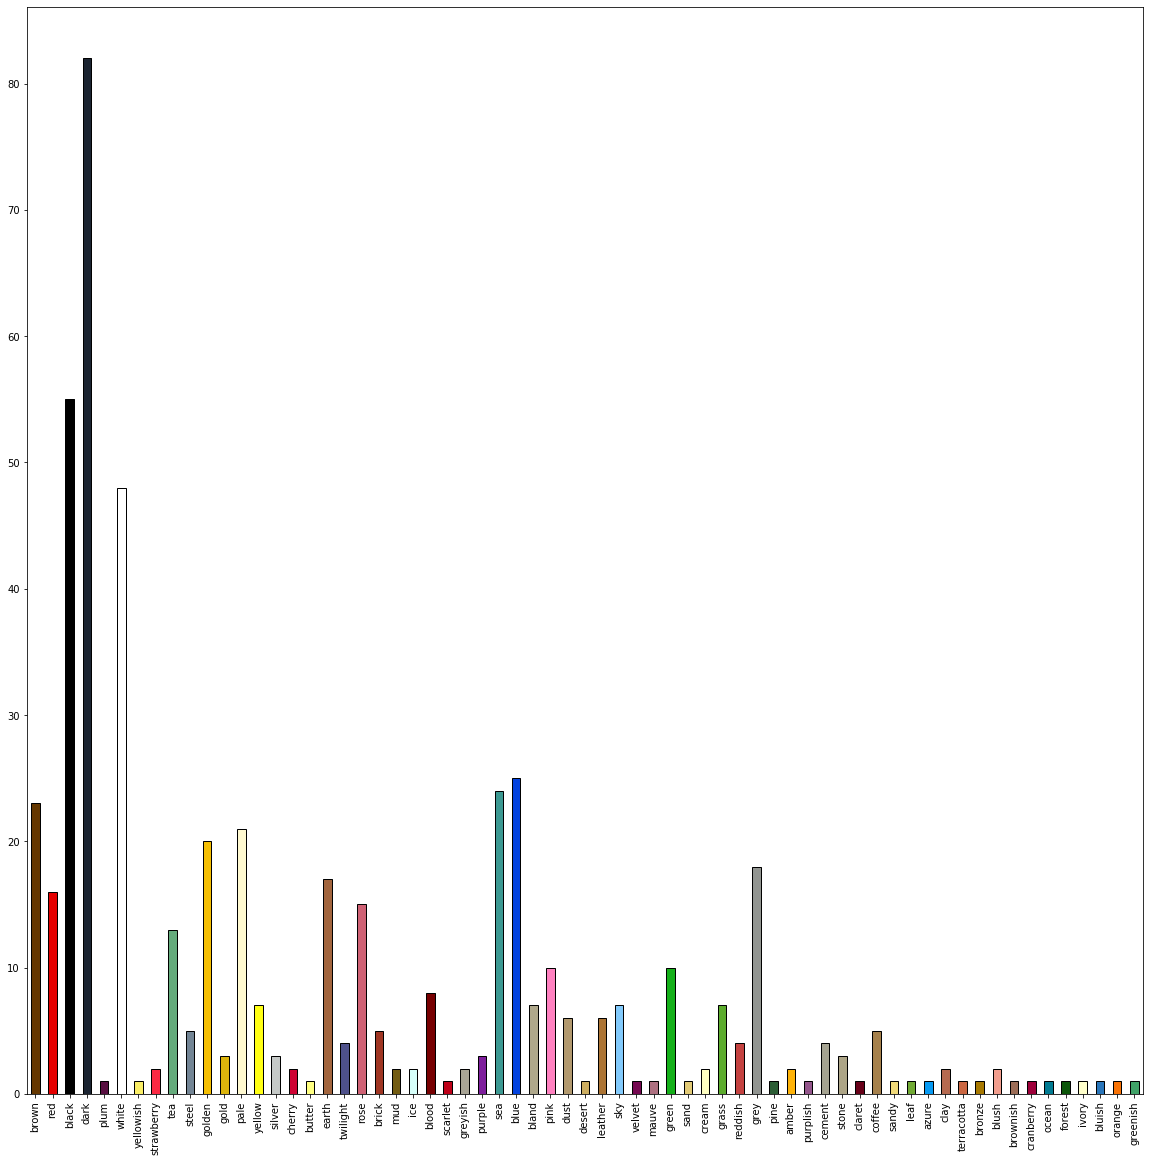



henry-and-cato.txt




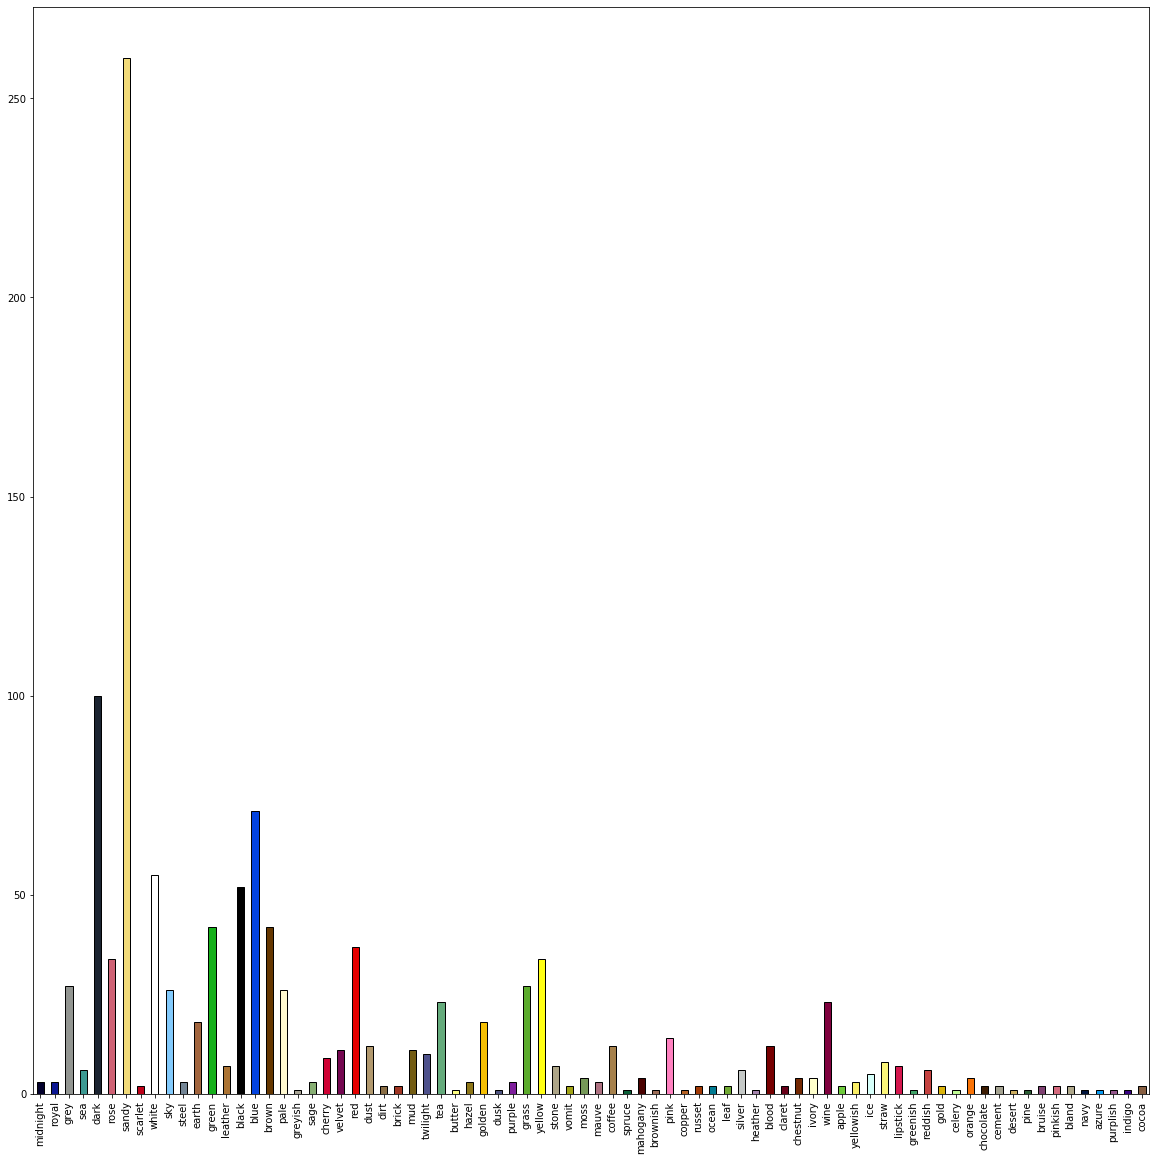



under-the-net.txt




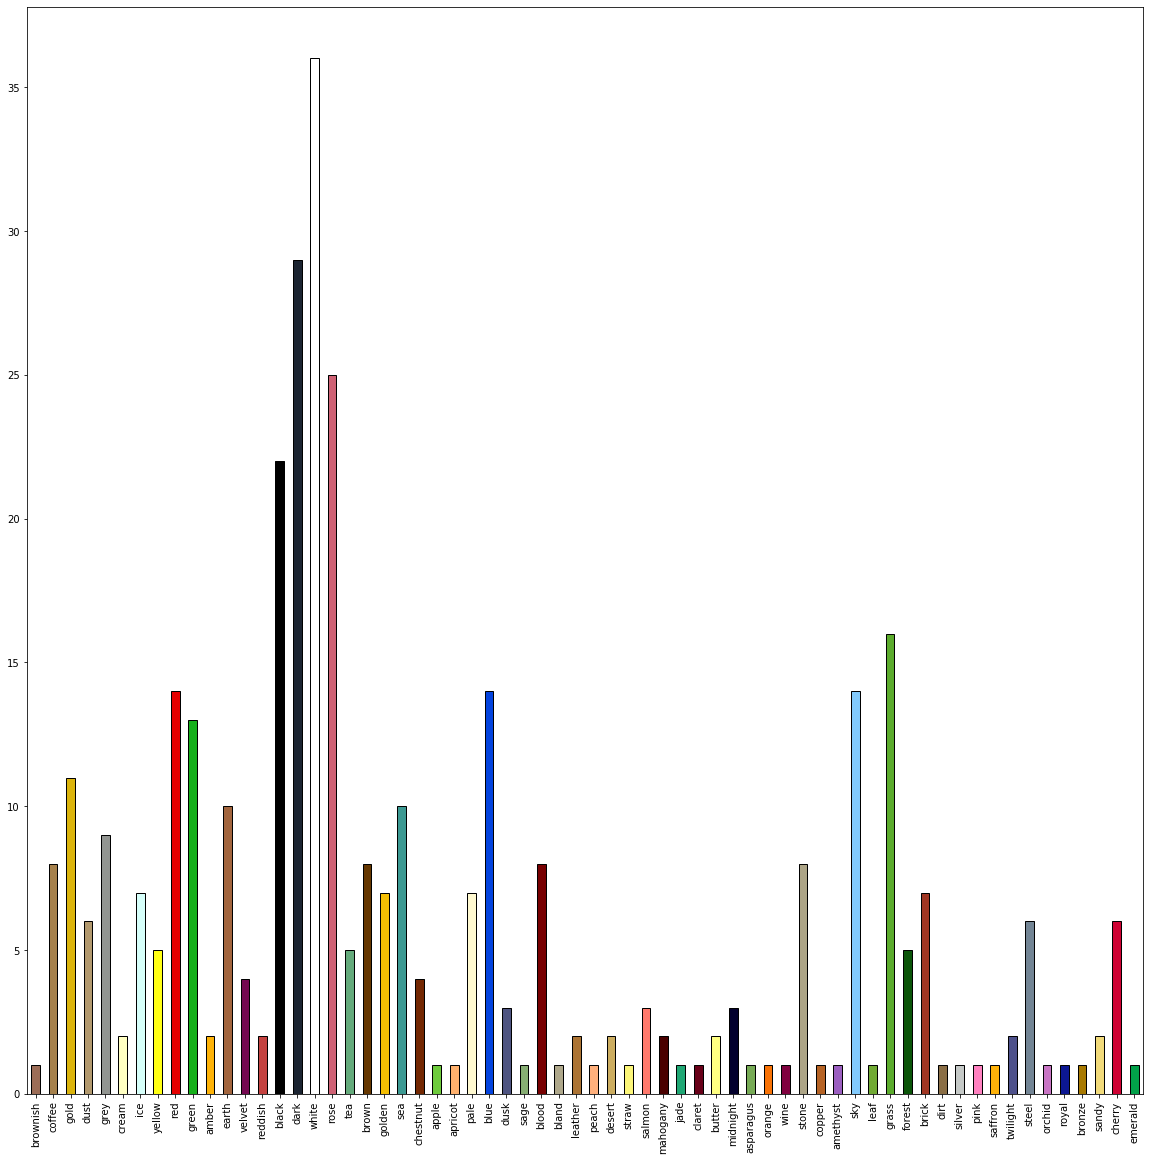



jackson-s-dilema.txt




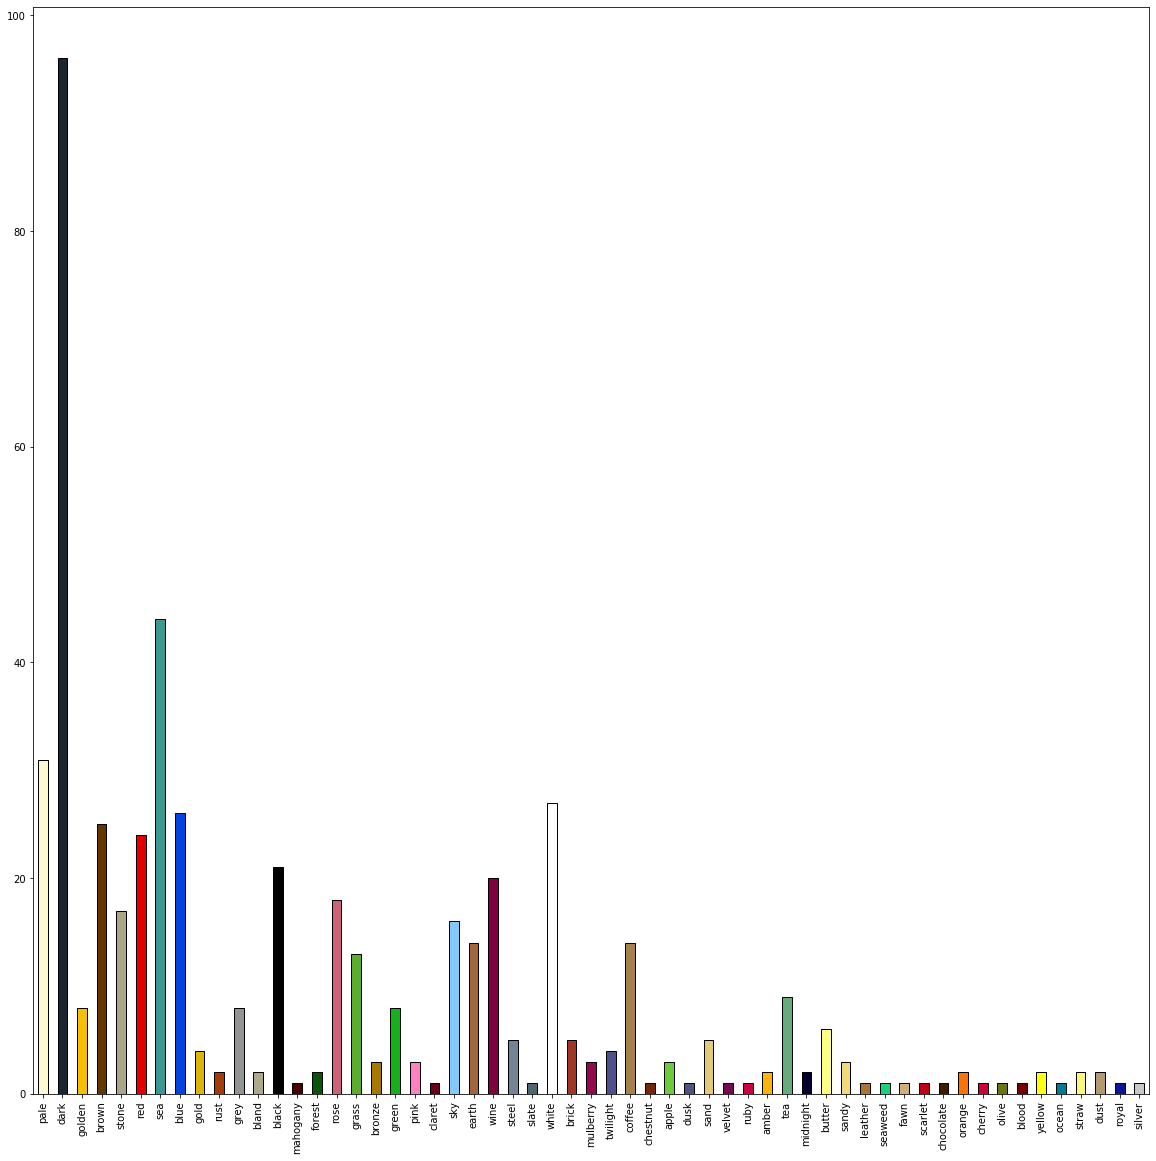



sandcastle.txt




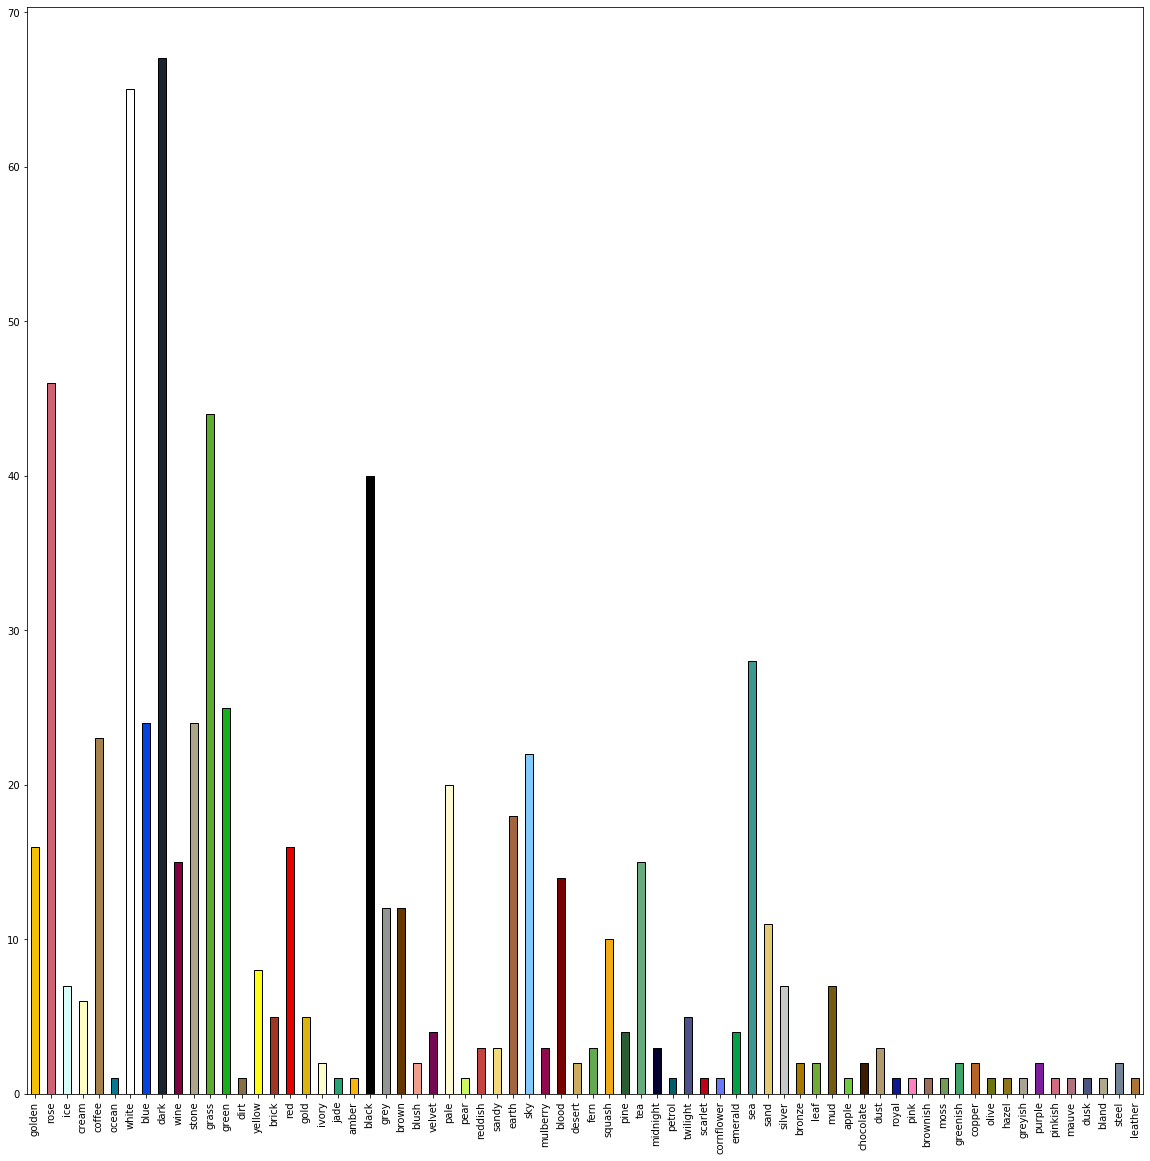



unofficial-rose.txt




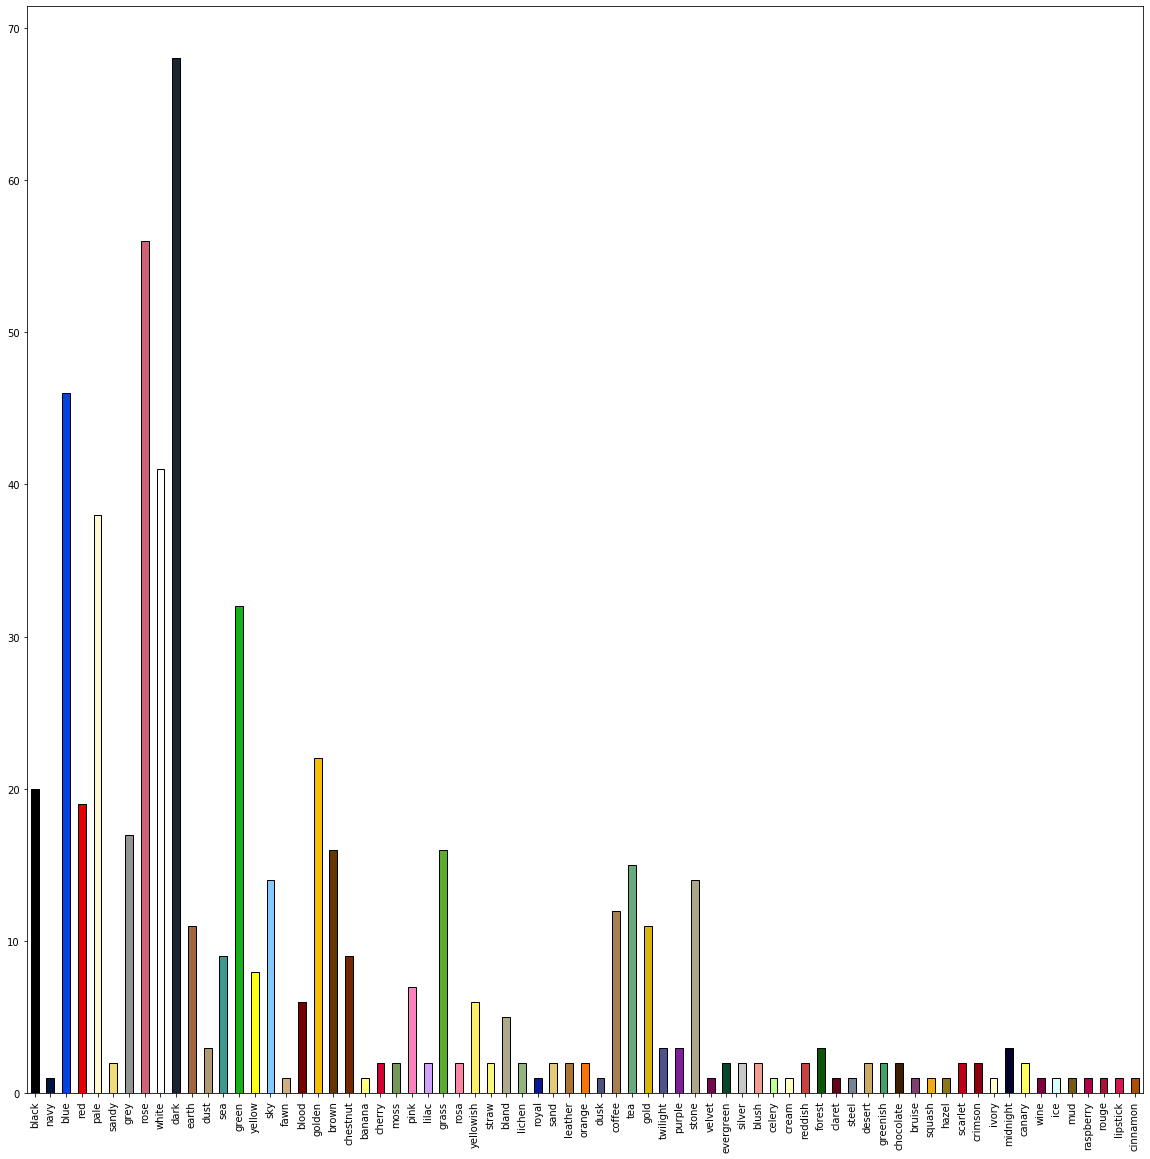



flight-from-the-enchanter.txt




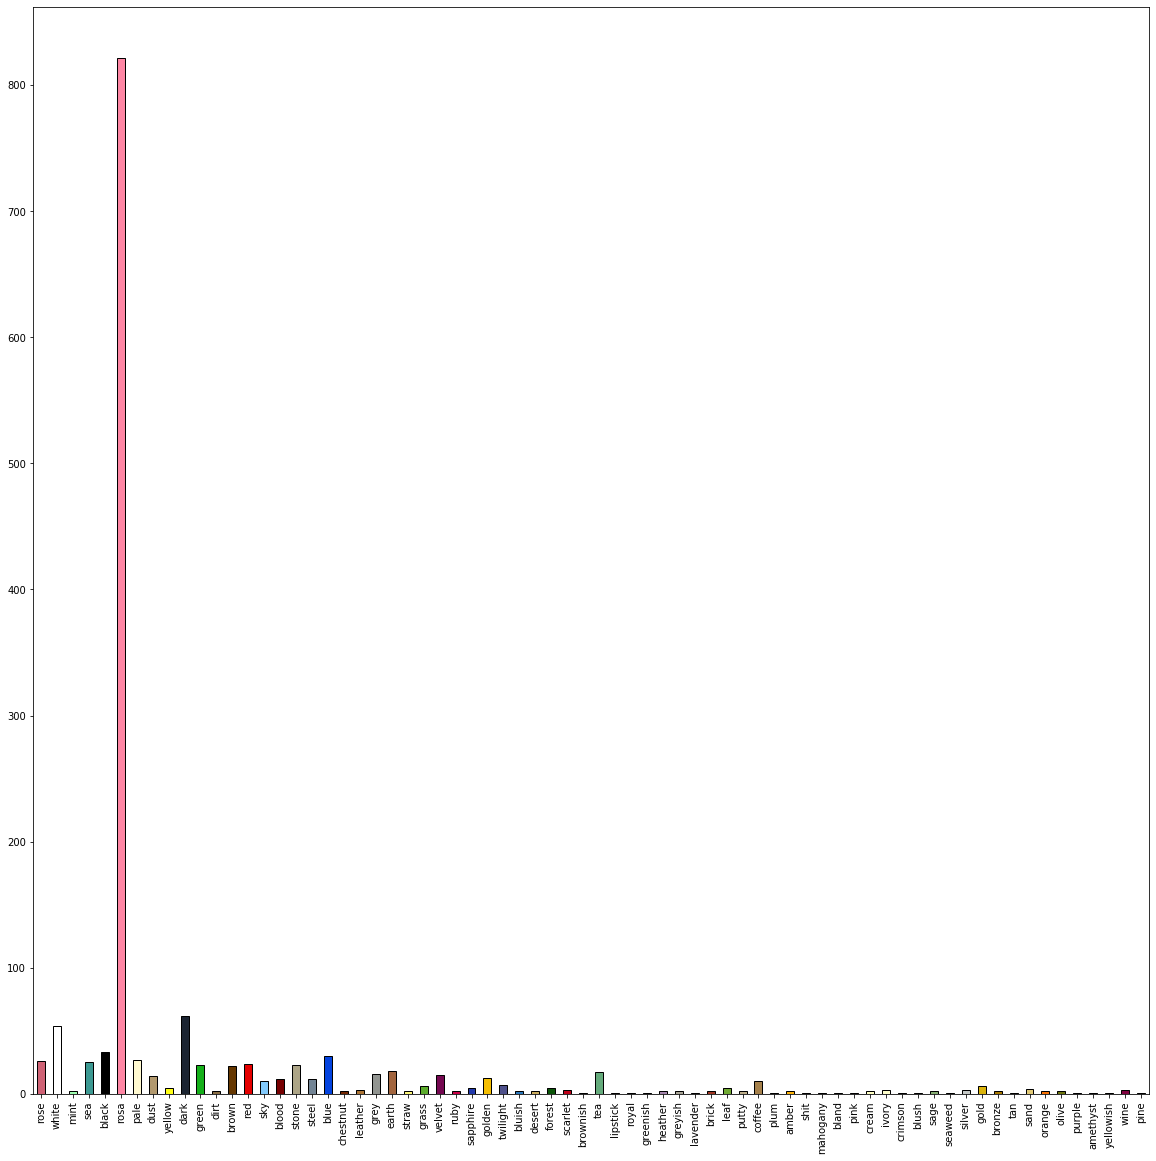



good-apprentice.txt




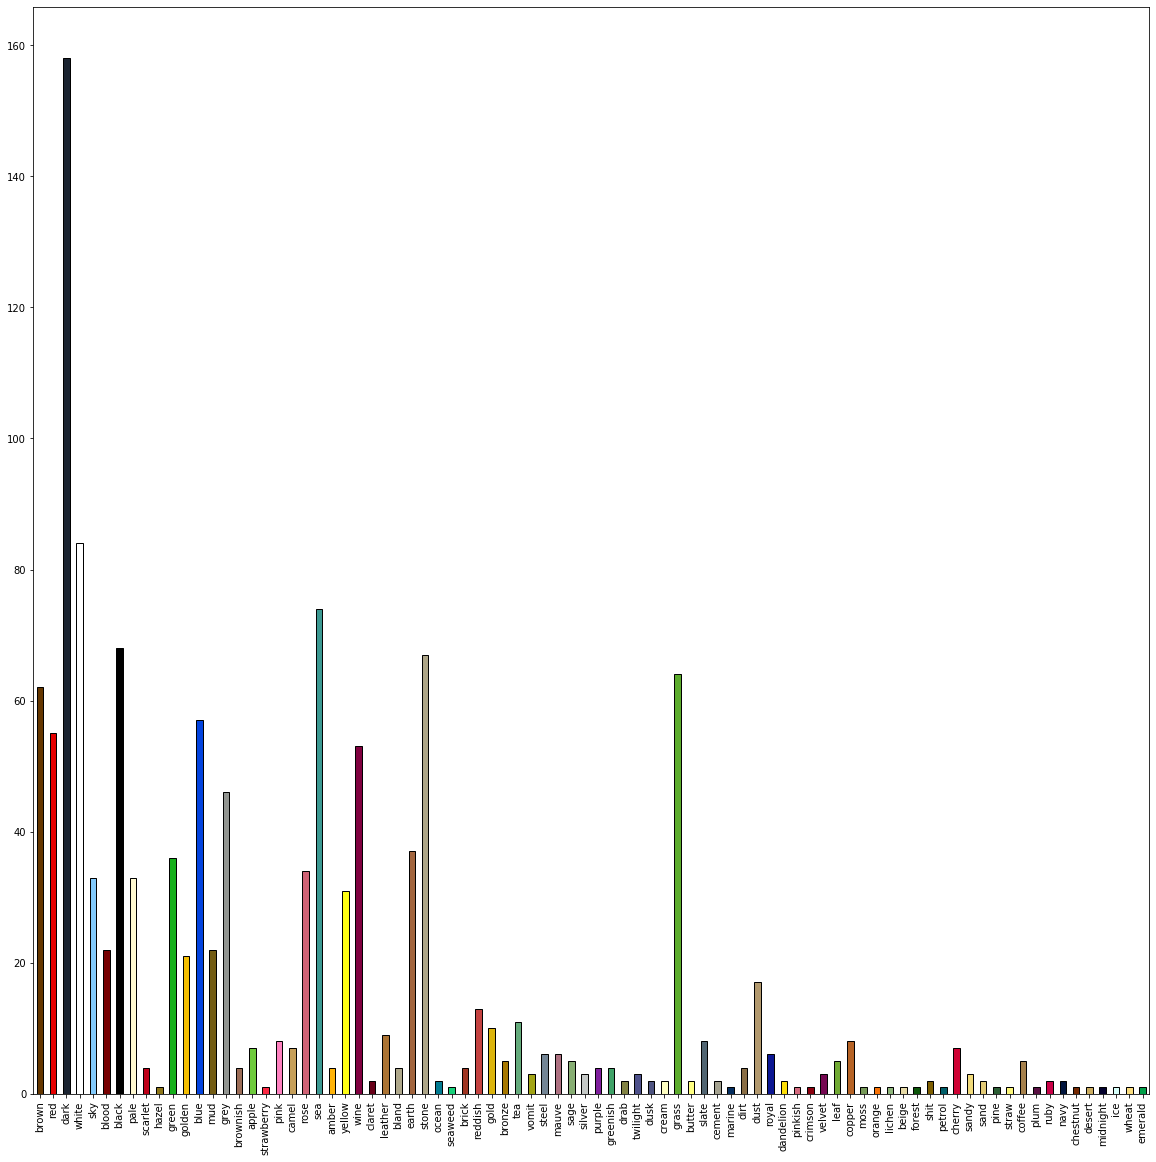



the-black-prince.txt




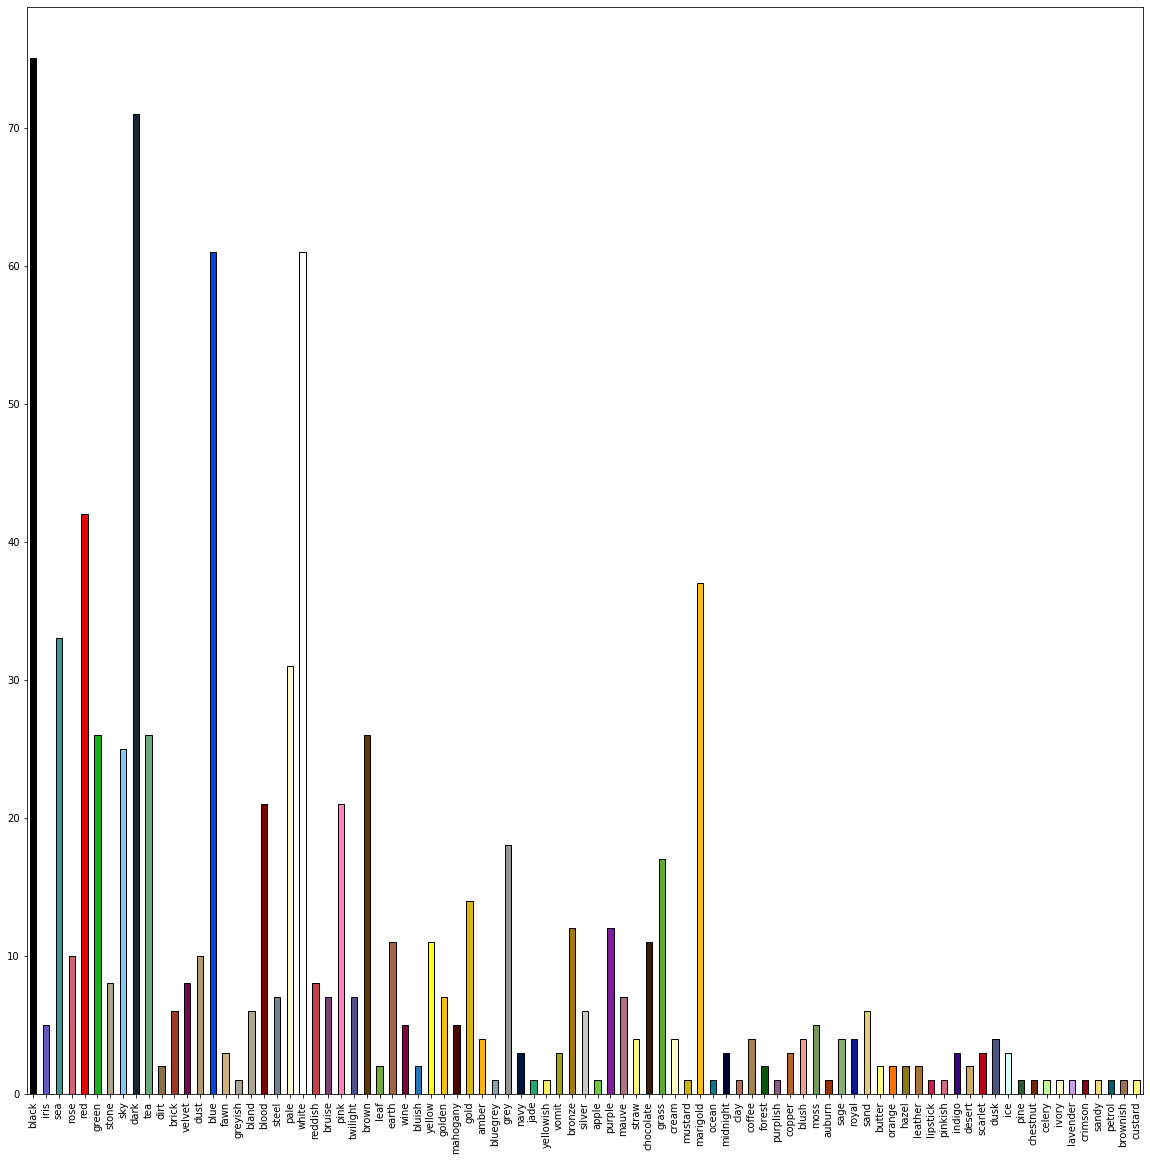



sacred-and-profane-love-machine.txt




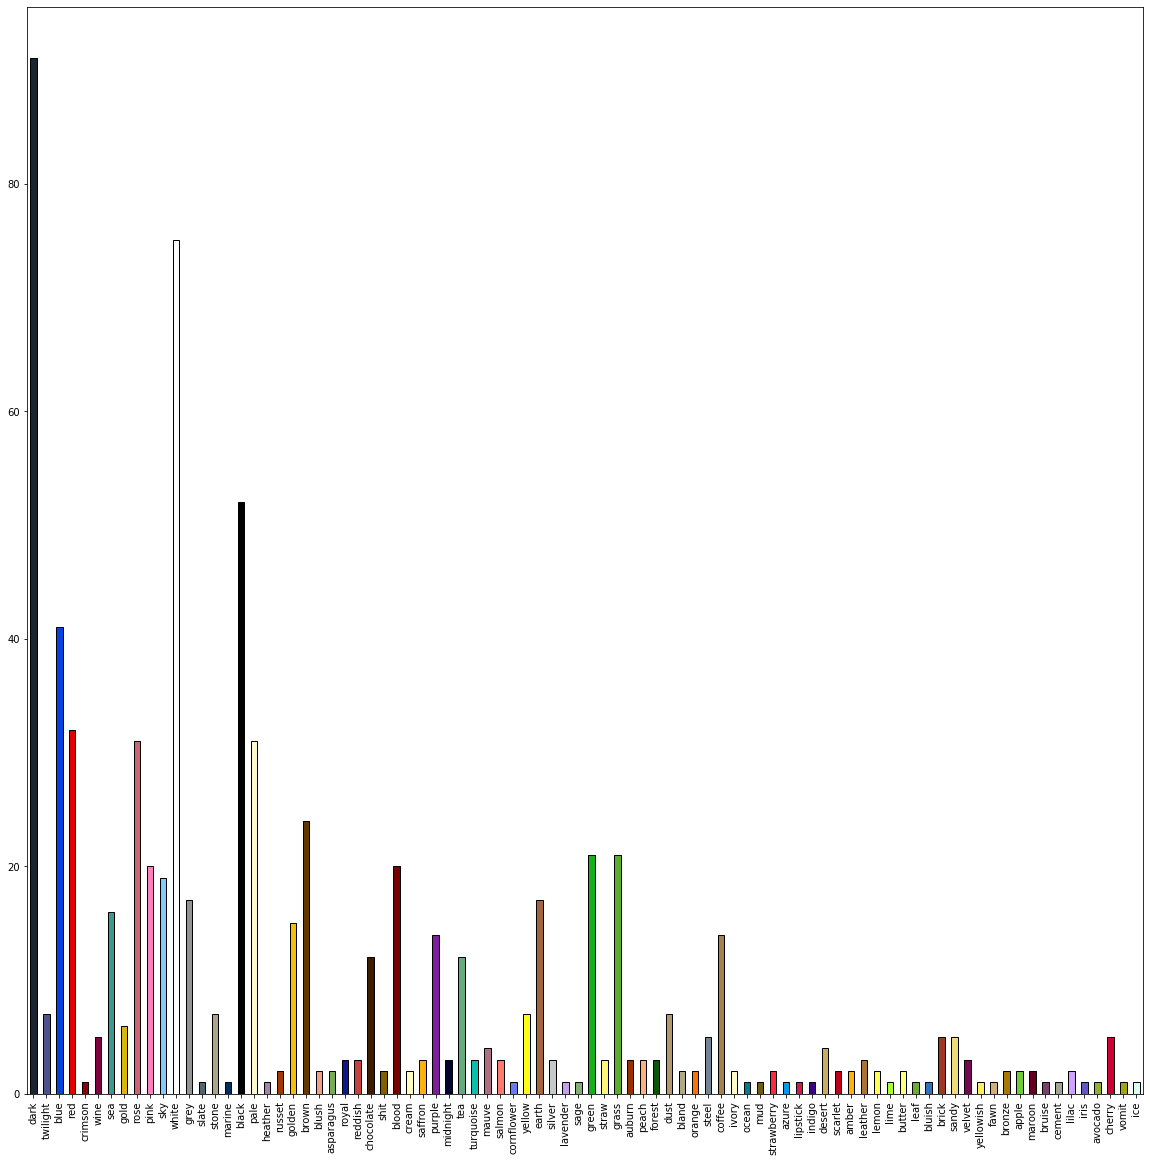



bruno-s-dream.txt




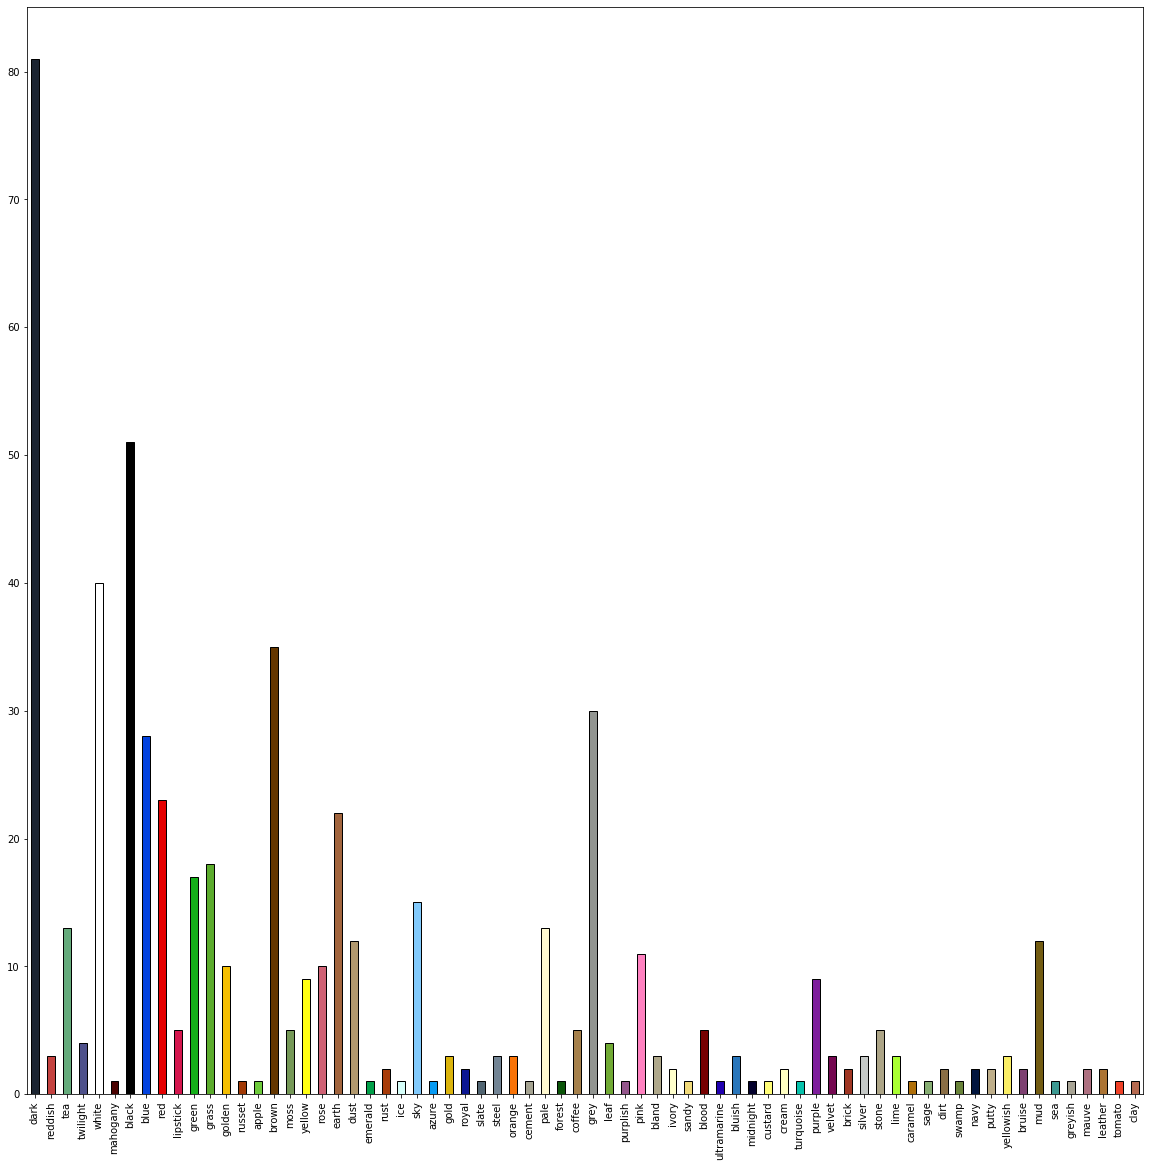



fairly-honourable-defeat.txt




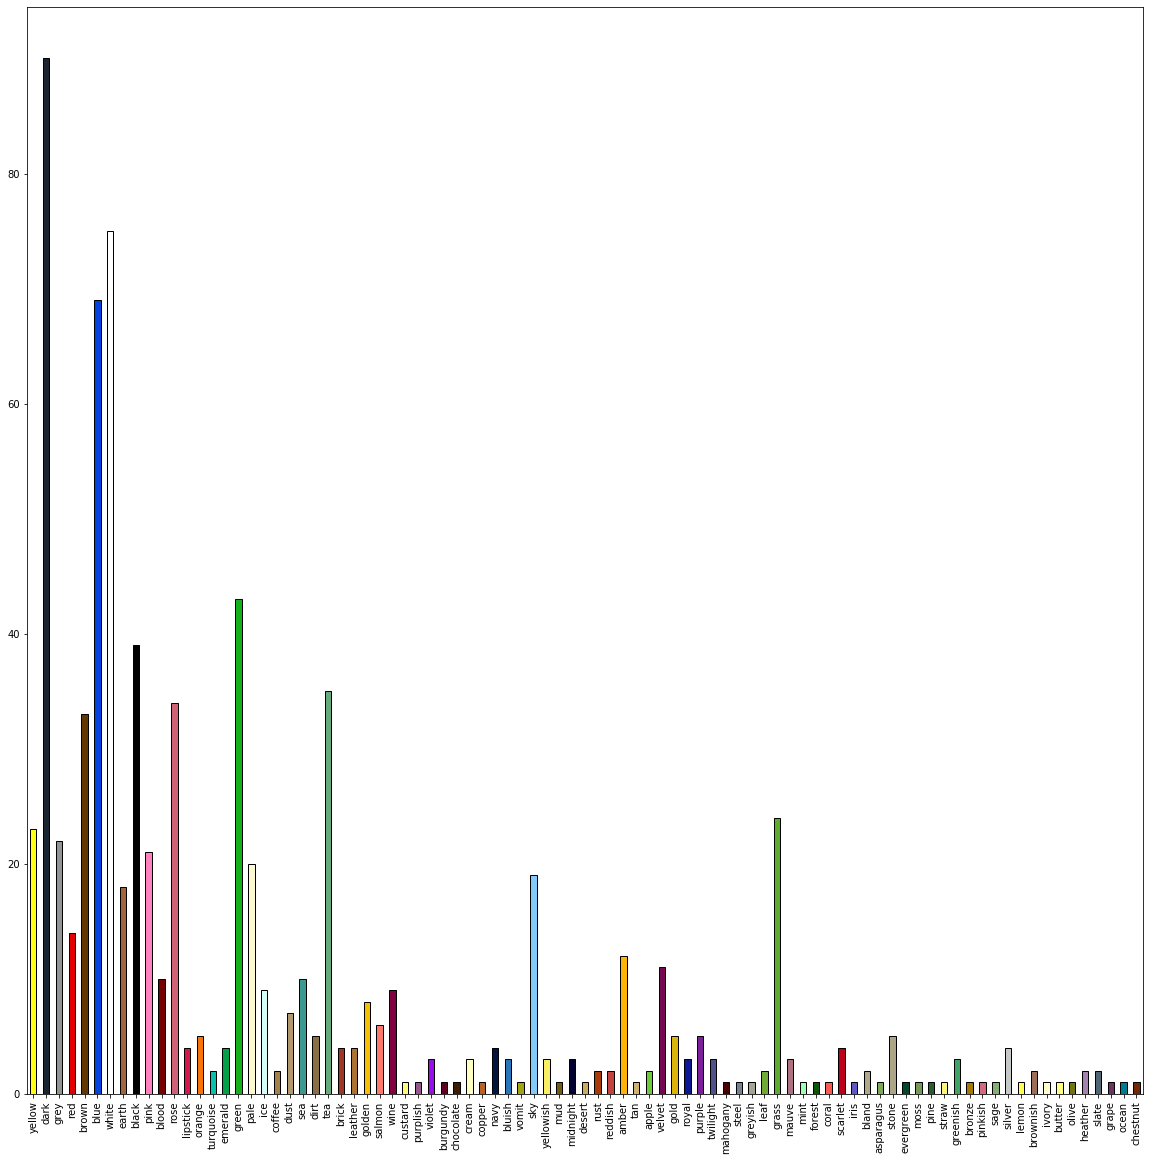



word-child.txt




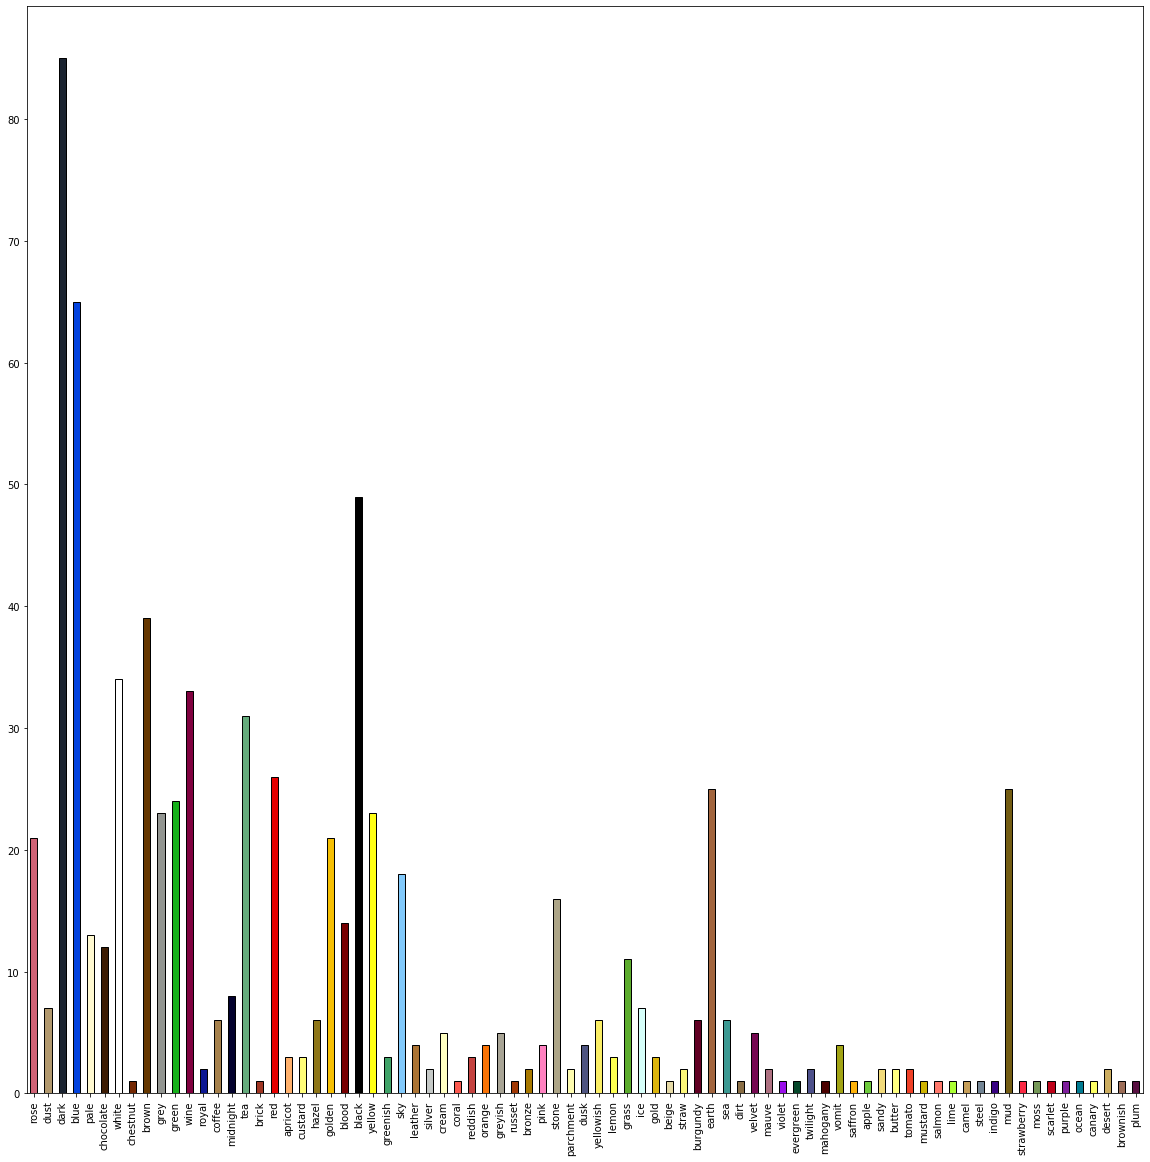



the-black-prince-novel.txt




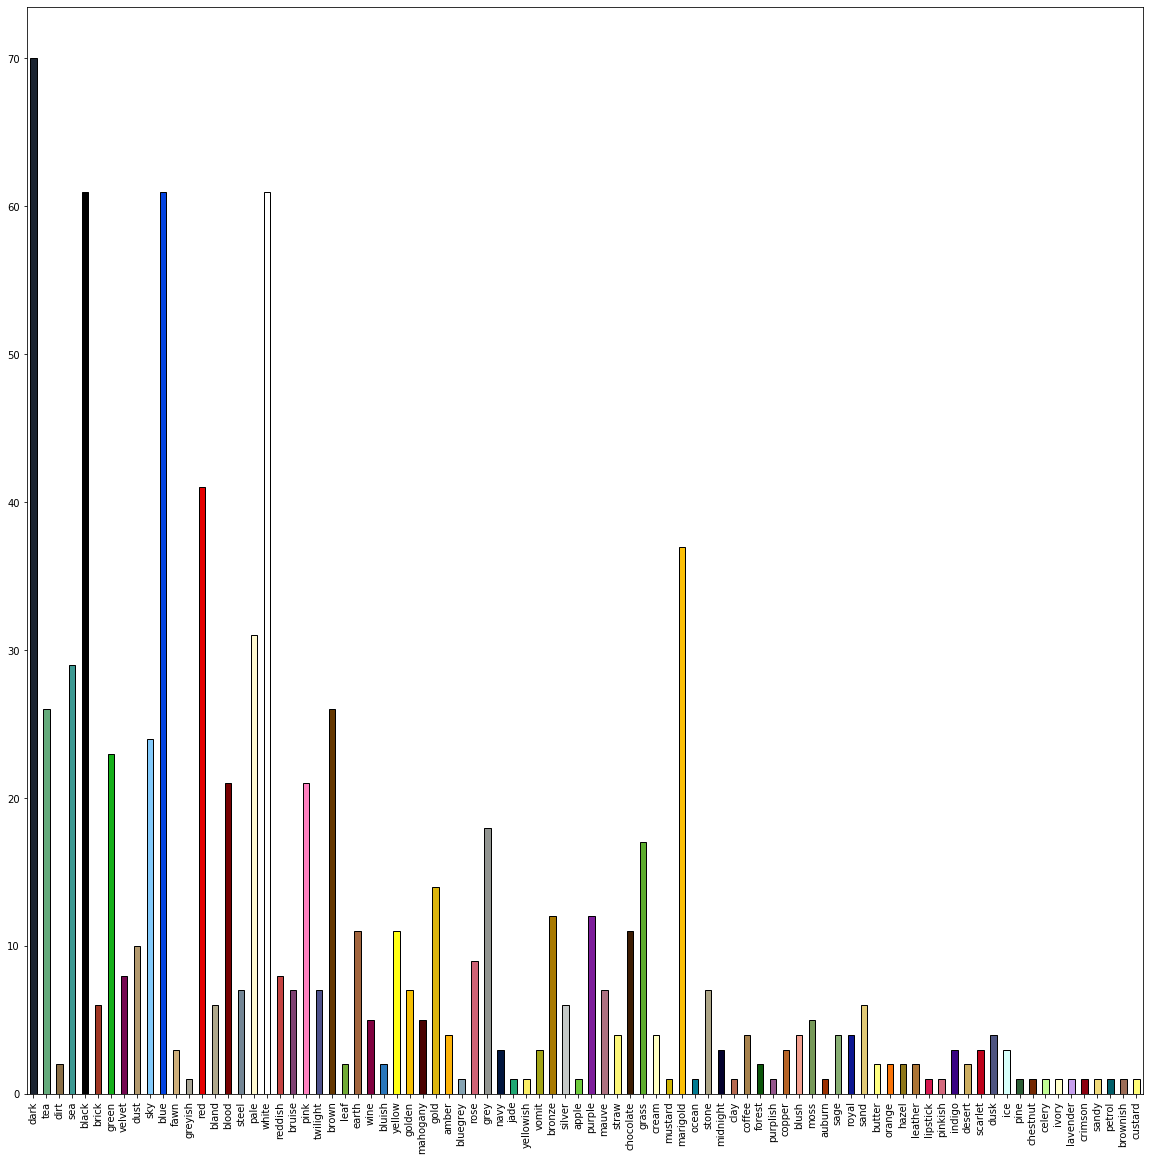

In [7]:
for title, df in colourCountDFs.items():
    hexColours = translateColoursToHex(df.keys())

    print(f"\n\n{title}\n\n")
    df.plot(kind='bar', color=hexColours, edgeColor='black', figsize=(20,20))
    plt.show()


In [8]:
colourHexDictionary = { colour.split(':')[1]: hex for colour, hex in mcd.XKCD_COLORS.items() }

In [9]:
def translateColoursToHex(listColourNames):
    """"Take a list of colour names ['red','blue','green'] and return hex list"""
    hexList = []
    for colourName in listColourNames:
        xkcdName = f"xkcd:{colourName}"
        if xkcdName in mcd.XKCD_COLORS:
            hexList.append(mcd.XKCD_COLORS[xkcdName])
        else:
            print("Not found" + colourName)

    return hexList